In [ ]:
!mkdir ~/.kaggle
!cp "/content/drive/MyDrive/ubuntu data/kaggle.json" ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d francescopettini/license-plate-characters-detection-ocr

 40% 5.00M/12.4M [00:00<00:00, 43.6MB/s]
100% 12.4M/12.4M [00:00<00:00, 63.2MB/s]


In [ ]:
!unzip /content/license-plate-characters-detection-ocr.zip

Archive:  /content/license-plate-characters-detection-ocr.zip
  inflating: LP-characters/annotations/0000.xml  
  inflating: LP-characters/annotations/0001.xml  
  inflating: LP-characters/annotations/0003.xml  
  inflating: LP-characters/annotations/0004.xml  
  inflating: LP-characters/annotations/0005.xml  
  inflating: LP-characters/annotations/0006.xml  
  inflating: LP-characters/annotations/0008.xml  
  inflating: LP-characters/annotations/0009.xml  
  inflating: LP-characters/annotations/0010.xml  
  inflating: LP-characters/annotations/0011.xml  
  inflating: LP-characters/annotations/0012.xml  
  inflating: LP-characters/annotations/0013.xml  
  inflating: LP-characters/annotations/0014.xml  
  inflating: LP-characters/annotations/0015.xml  
  inflating: LP-characters/annotations/0016.xml  
  inflating: LP-characters/annotations/0017.xml  
  inflating: LP-characters/annotations/0018.xml  
  inflating: LP-characters/annotations/0019.xml  
  inflating: LP-characters/annotations

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import re

In [ ]:
import xml.etree.ElementTree as ET

def extract_characters(xml_file,name_):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    characters = []

    for obj in root.findall(".//object"):
        name = obj.find("name").text
        xmin = int(obj.find("bndbox/xmin").text)
        ymin = int(obj.find("bndbox/ymin").text)
        xmax = int(obj.find("bndbox/xmax").text)
        ymax = int(obj.find("bndbox/ymax").text)

        characters.append([name_,name,[xmin,xmax,ymin,ymax]])
    return characters


In [ ]:
characters_dataset=[]
plate_dataset=[]

def plate(i):
  global characters_dataset  # Declare characters_dataset as a global variable
  global plate_dataset  # Declare characters_dataset as a global variable
  l = './LP-characters/annotations/' + i.split('.')[0] + '.xml'
  chars=extract_characters(l,i)
  characters_dataset+=chars
  text=""
  for x in chars:
    text+=x[1]
  plate_dataset.append([i,text])

l=os.listdir('./LP-characters/images')
for x in l:
  plate(x)

In [ ]:
plate_dataset[0]

['0070.png', 'MH13BN4348']

In [ ]:
!rm -rf './scut_data/'
!mkdir 'scut_data'
!mkdir './scut_data/scut_train'

In [ ]:
for x in characters_dataset:
    # Read the image
    img = cv2.imread('./LP-characters/images/' + x[0])

    # Crop the image based on coordinates
    idx=x[2]
    img = img[idx[2]:idx[3], idx[0]:idx[1]]
    img=cv2.resize(img, (50, 50))
       # Find the number of files with name x[1].png in './all_data/'
    n = len([f for f in os.listdir('./scut_data/scut_train/') if f.split('_')[0] == x[1]])

    # Save the cropped image with a modified filename
    cv2.imwrite('./scut_data/scut_train/' + x[1] + '_' + str(n) + '.png', img)

In [ ]:
for x in plate_dataset:
    # Read the image
    img = cv2.imread('./LP-characters/images/' + x[0])
    img=cv2.resize(img,(300,150))
    n = len([f for f in os.listdir('./scut_data/scut_train/') if f.split('_')[0] == x[1]])
    # Save the cropped image with a modified filename
    cv2.imwrite('./scut_data/scut_train/' + x[1] + '_' + str(n) + '.png', img)

In [ ]:
text=""
l=os.listdir('./scut_data/scut_train')
for x in l:
  text+=x+"\t"+x.split('_')[0]
  text+='\n'
with open('./scut_data/scut_train.txt','w') as f:
  f.write(text)
  f.close()

## TrOCR

In [ ]:
!pip install -q transformers
!pip install -q sentencepiece
!pip install -q jiwer
!pip install -q datasets
!pip install -q evaluate
!pip install -q -U accelerate

!pip install -q matplotlib
!pip install -q protobuf==3.20.1
!pip install -q tensorboard

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-ai-generativelanguage 0.4.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 3.20.1 which is

In [ ]:
import os
import torch
import evaluate
import numpy as np
import pandas as pd
import glob as glob
import torch.optim as optim
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

from PIL import Image
from zipfile import ZipFile
from tqdm.notebook import tqdm
from dataclasses import dataclass
from torch.utils.data import Dataset
from urllib.request import urlretrieve
from transformers import (
    VisionEncoderDecoderModel,
    TrOCRProcessor,
    Seq2SeqTrainer,
    Seq2SeqTrainingArguments,
    default_data_collator
)

block_plot = False
plt.rcParams['figure.figsize'] = (12, 9)

In [ ]:
bold = f"\033[1m"
reset = f"\033[0m"

In [ ]:
def seed_everything(seed_value):
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_everything(42)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assets....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [ ]:
# URL = r"https://www.dropbox.com/scl/fi/vyvr7jbdvu8o174mbqgde/scut_data.zip?rlkey=fs8axkpxunwu6if9a2su71kxs&dl=1"
# asset_zip_path = os.path.join(os.getcwd(), "scut_data.zip")
# # Download if asset ZIP does not exist.
# if not os.path.exists(asset_zip_path):
#     download_and_unzip(URL, asset_zip_path)

In [ ]:
@dataclass(frozen=True)
class TrainingConfig:
    BATCH_SIZE:    int = 4
    EPOCHS:        int = 3
    LEARNING_RATE: float = 0.00005

@dataclass(frozen=True)
class DatasetConfig:
    DATA_ROOT:     str = 'scut_data'

@dataclass(frozen=True)
class ModelConfig:
    MODEL_NAME: str = 'microsoft/trocr-small-printed'

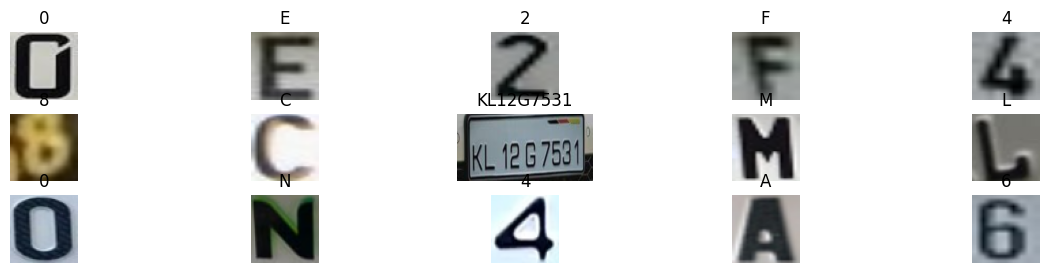

In [ ]:
def visualize(dataset_path):
    plt.figure(figsize=(15, 3))
    for i in range(15):
        plt.subplot(3, 5, i+1)
        all_images = os.listdir(f"{dataset_path}/scut_train")
        image = plt.imread(f"{dataset_path}/scut_train/{all_images[i]}")
        plt.imshow(image)
        plt.axis('off')
        plt.title(all_images[i].split('_')[0])
    plt.show()

visualize(DatasetConfig.DATA_ROOT)

In [ ]:
file_path = os.path.join(DatasetConfig.DATA_ROOT, 'scut_train.txt')
train_df = pd.read_csv(file_path, sep='\t', header=None, names=['file_name', 'text'])

In [ ]:
train_df.head()

file_name text
0    0_1.png    0
1   E_33.png    E
2  2_112.png    2
3    F_3.png    F
4   4_93.png    4

In [ ]:
# Augmentations.
train_transforms = transforms.Compose([
    transforms.ColorJitter(brightness=.5, hue=.3),
    transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
])

In [ ]:
class CustomOCRDataset(Dataset):
    def __init__(self, root_dir, df, processor, max_target_length=128):
        self.root_dir = root_dir
        self.df = df
        self.processor = processor
        self.max_target_length = max_target_length

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        # The image file name.
        file_name = self.df['file_name'][idx]
        # The text (label).
        text = self.df['text'][idx]
        # Read the image, apply augmentations, and get the transformed pixels.
        image = Image.open(self.root_dir + file_name).convert('RGB')
        image = train_transforms(image)
        pixel_values = self.processor(image, return_tensors='pt').pixel_values
        # Pass the text through the tokenizer and get the labels,
        # i.e. tokenized labels.
        labels = self.processor.tokenizer(
            text,
            padding='max_length',
            max_length=self.max_target_length
        ).input_ids
        # We are using -100 as the padding token.
        labels = [label if label != self.processor.tokenizer.pad_token_id else -100 for label in labels]
        encoding = {"pixel_values": pixel_values.squeeze(), "labels": torch.tensor(labels)}
        return encoding

In [ ]:
processor = TrOCRProcessor.from_pretrained(ModelConfig.MODEL_NAME)
train_dataset = CustomOCRDataset(
    root_dir=os.path.join(DatasetConfig.DATA_ROOT, 'scut_train/'),
    df=train_df,
    processor=processor
)
# valid_dataset = CustomOCRDataset(
#     root_dir=os.path.join(DatasetConfig.DATA_ROOT, 'scut_test/'),
#     df=test_df,
#     processor=processor
# )

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


In [ ]:
print("Number of training examples:", len(train_dataset))

Number of training examples: 2235


In [ ]:
encoding = train_dataset[0]
for k,v in encoding.items():
    print(k, v.shape)

pixel_values torch.Size([3, 384, 384])
labels torch.Size([128])


(-0.5, 49.5, 49.5, -0.5)

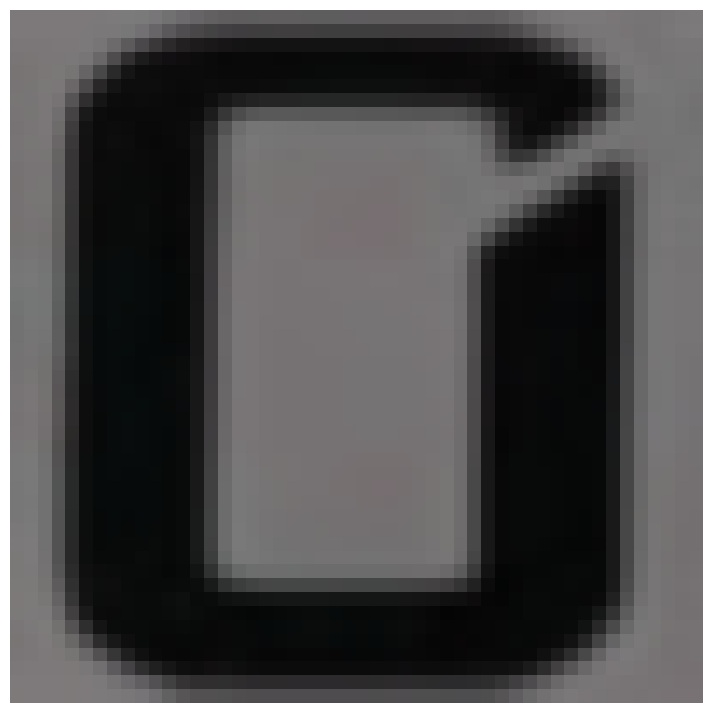

In [ ]:
image = Image.open(train_dataset.root_dir + train_df['file_name'][0]).convert("RGB")
image = train_transforms(image)
plt.imshow(image)
plt.axis('off')

In [ ]:
labels = encoding['labels']
labels[labels == -100] = processor.tokenizer.pad_token_id
label_str = processor.decode(labels, skip_special_tokens=True)
print(label_str)

0


In [ ]:
model = VisionEncoderDecoderModel.from_pretrained(ModelConfig.MODEL_NAME)
model.to(device)
print(model)
# Total parameters and trainable parameters.
total_params = sum(p.numel() for p in model.parameters())
print(f"{total_params:,} total parameters.")
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f"{total_trainable_params:,} training parameters.")

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-small-printed and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


VisionEncoderDecoderModel(
  (encoder): DeiTModel(
    (embeddings): DeiTEmbeddings(
      (patch_embeddings): DeiTPatchEmbeddings(
        (projection): Conv2d(3, 384, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): DeiTEncoder(
      (layer): ModuleList(
        (0-11): 12 x DeiTLayer(
          (attention): DeiTAttention(
            (attention): DeiTSelfAttention(
              (query): Linear(in_features=384, out_features=384, bias=True)
              (key): Linear(in_features=384, out_features=384, bias=True)
              (value): Linear(in_features=384, out_features=384, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): DeiTSelfOutput(
              (dense): Linear(in_features=384, out_features=384, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): DeiTIntermediate(
            (dense): Linear(

In [ ]:
# Set special tokens used for creating the decoder_input_ids from the labels.
model.config.decoder_start_token_id = processor.tokenizer.cls_token_id
model.config.pad_token_id = processor.tokenizer.pad_token_id
# Set Correct vocab size.
model.config.vocab_size = model.config.decoder.vocab_size
model.config.eos_token_id = processor.tokenizer.sep_token_id

model.config.max_length = 64
model.config.early_stopping = True
model.config.no_repeat_ngram_size = 3
model.config.length_penalty = 2.0
model.config.num_beams = 4

In [ ]:
optimizer = optim.AdamW(
    model.parameters(), lr=TrainingConfig.LEARNING_RATE, weight_decay=0.0005
)

In [ ]:
cer_metric = evaluate.load('cer')

In [ ]:
def compute_cer(pred):
    labels_ids = pred.label_ids
    pred_ids = pred.predictions

    pred_str = processor.batch_decode(pred_ids, skip_special_tokens=True)
    labels_ids[labels_ids == -100] = processor.tokenizer.pad_token_id
    label_str = processor.batch_decode(labels_ids, skip_special_tokens=True)

    cer = cer_metric.compute(predictions=pred_str, references=label_str)

    return {"cer": cer}

In [ ]:
training_args = Seq2SeqTrainingArguments(
    predict_with_generate=True,
    evaluation_strategy='epoch',
    per_device_train_batch_size=TrainingConfig.BATCH_SIZE,
    per_device_eval_batch_size=TrainingConfig.BATCH_SIZE,
    fp16=True,
    output_dir='seq2seq_model_printed/',
    logging_strategy='epoch',
    save_strategy='epoch',
    save_total_limit=5,
    report_to='tensorboard',
    num_train_epochs=TrainingConfig.EPOCHS
)

In [ ]:
# Initialize trainer.
trainer = Seq2SeqTrainer(
    model=model,
    tokenizer=processor.feature_extractor,
    args=training_args,
    compute_metrics=compute_cer,
    train_dataset=train_dataset,
    eval_dataset=train_dataset,
    data_collator=default_data_collator
)

In [ ]:
res = trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1473: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(


In [ ]:
res

TrainOutput(global_step=1677, training_loss=0.33541921070806313, metrics={'train_runtime': 666.8311, 'train_samples_per_second': 10.055, 'train_steps_per_second': 2.515, 'total_flos': 8.020835291470234e+17, 'train_loss': 0.33541921070806313, 'epoch': 3.0})

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available else 'cpu')

In [ ]:
processor = TrOCRProcessor.from_pretrained(ModelConfig.MODEL_NAME)
trained_model = VisionEncoderDecoderModel.from_pretrained('seq2seq_model_printed/checkpoint-'+str(res.global_step)).to(device)

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


In [ ]:
# processor = TrOCRProcessor.from_pretrained('microsoft/trocr-small-printed')
# model = VisionEncoderDecoderModel.from_pretrained(
#     'microsoft/trocr-small-printed'
# ).to(device)

In [ ]:
def read_and_show(image_path):
    """
    :param image_path: String, path to the input image.

    Returns:
        image: PIL Image.
    """
    image = Image.open(image_path).convert('RGB')
    return image

In [ ]:
def ocr(image, processor, model):
    """
    :param image: PIL Image.
    :param processor: Huggingface OCR processor.
    :param model: Huggingface OCR model.

    Returns:
        generated_text: the OCR'd text string.
    """
    # We can directly perform OCR on cropped images.
    pixel_values = processor(image, return_tensors='pt').pixel_values.to(device)
    generated_ids = model.generate(pixel_values)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    return generated_text

In [ ]:
def eval_new_data(
    data_path=os.path.join(DatasetConfig.DATA_ROOT, 'scut_test', '*'),
    num_samples=50
):
    image_paths = glob.glob(data_path)
    for i, image_path in tqdm(enumerate(image_paths), total=len(image_paths)):
        if i == num_samples:
            break
        image = read_and_show(image_path)
        # text = ocr(image, processor, model)
        text = ocr(image, processor, trained_model)
        plt.figure(figsize=(7, 4))
        plt.imshow(image)
        plt.title(text)
        plt.axis('off')
        plt.show()

  0%|          | 0/2235 [00:00<?, ?it/s]

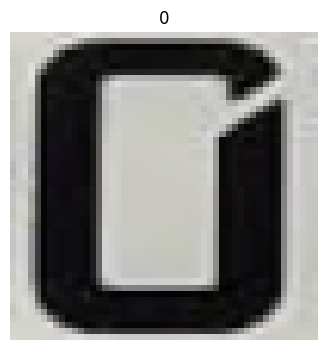

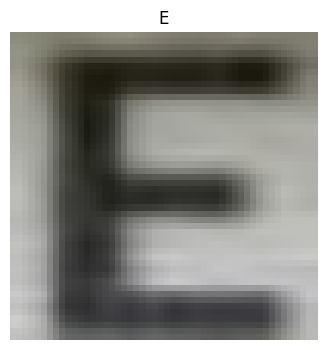

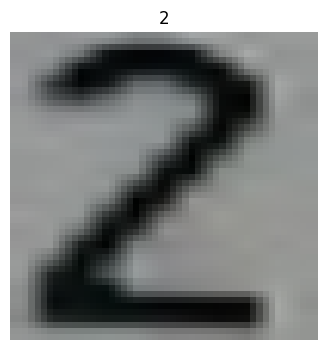

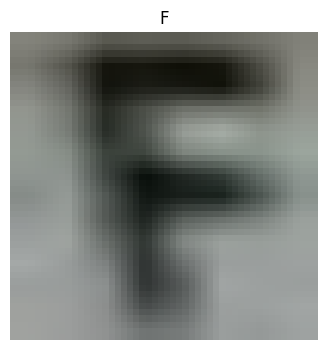

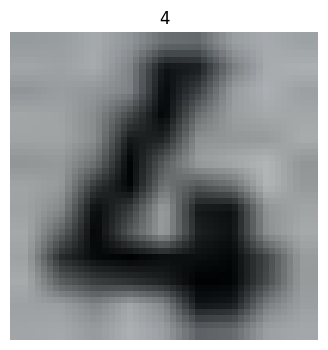

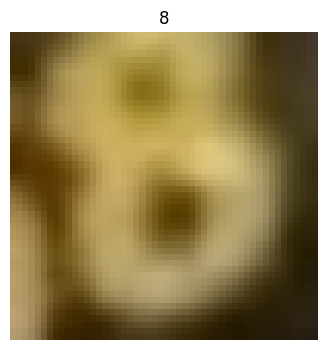

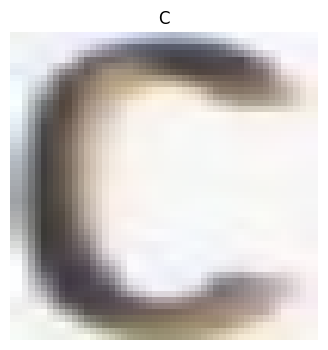

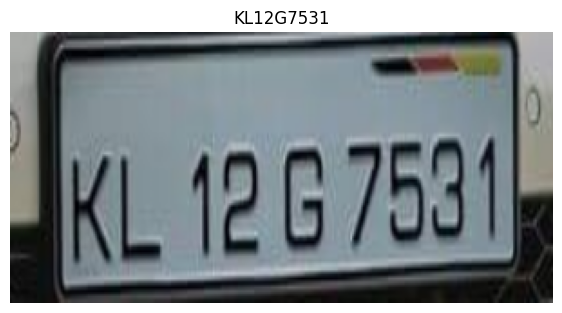

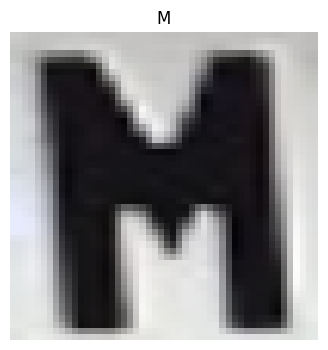

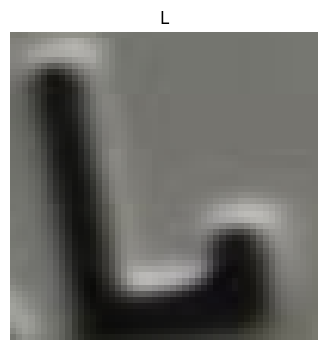

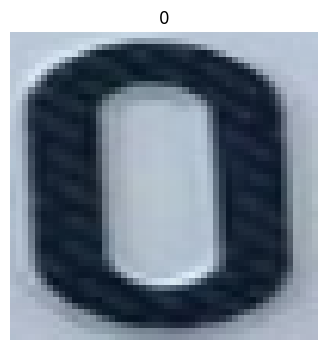

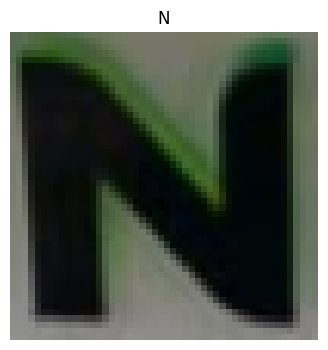

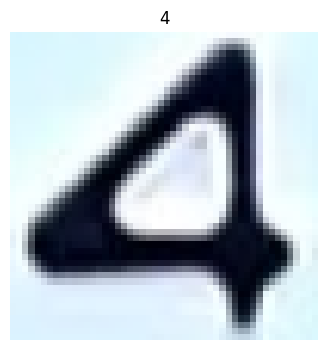

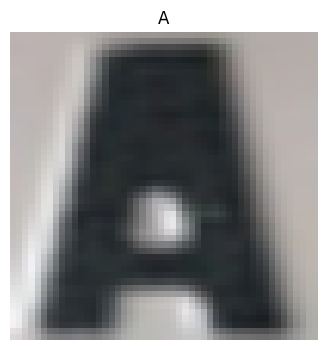

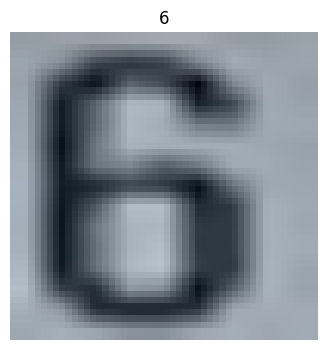

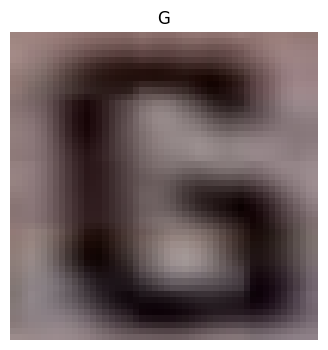

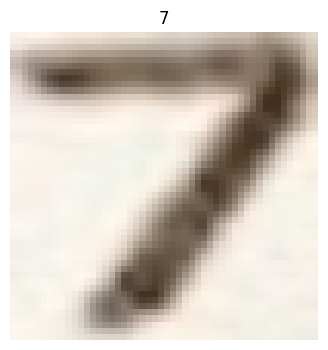

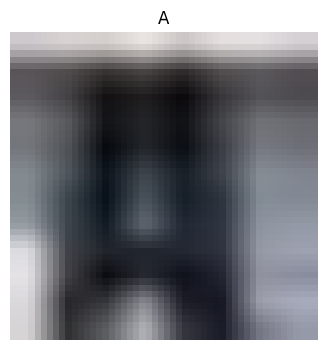

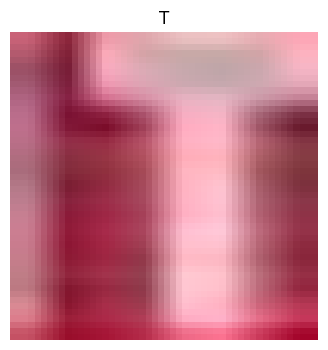

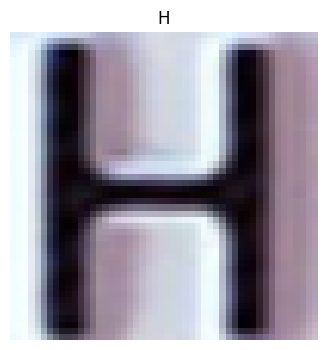

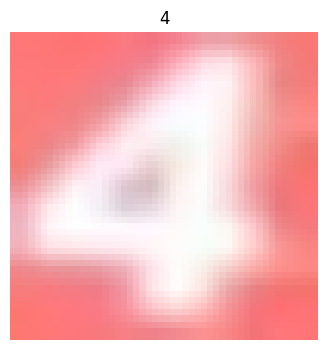

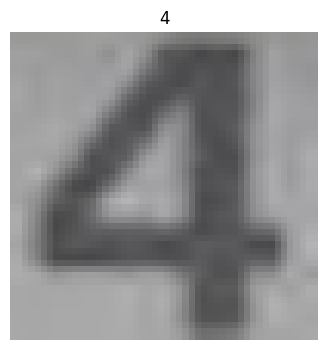

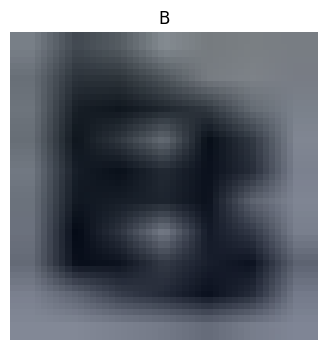

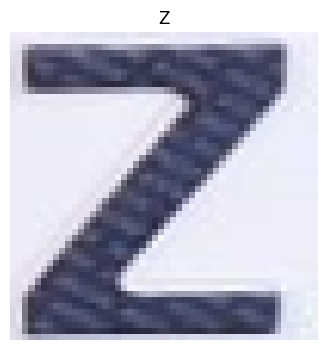

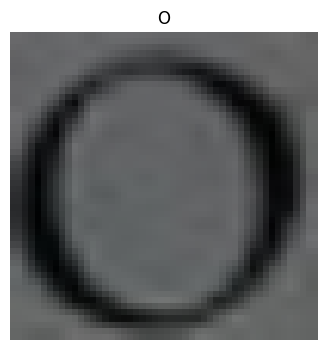

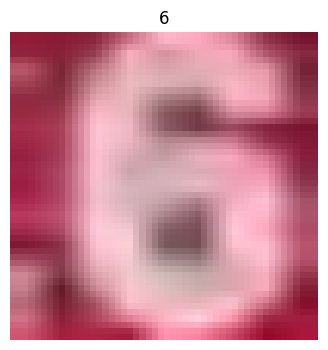

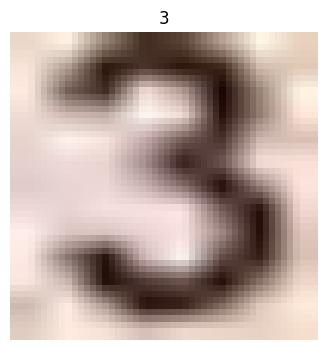

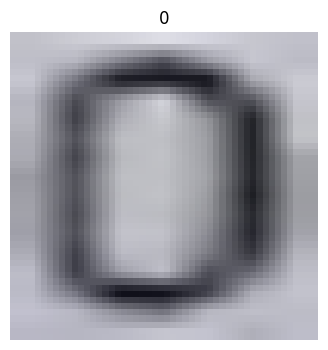

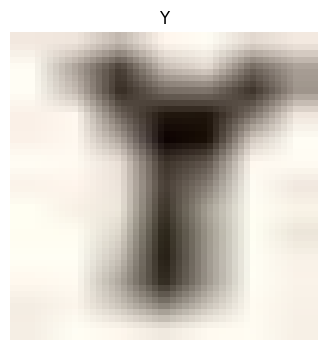

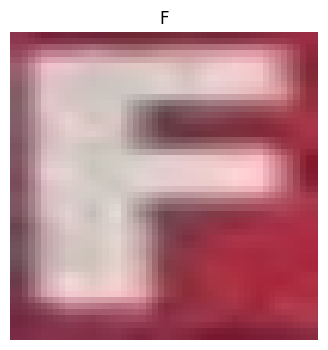

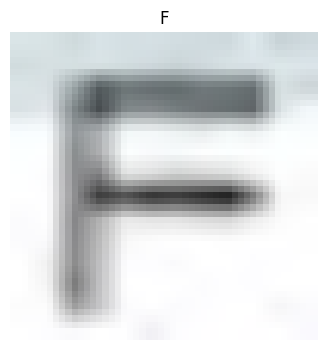

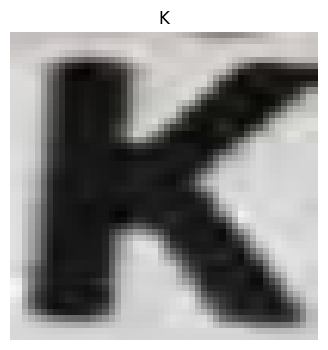

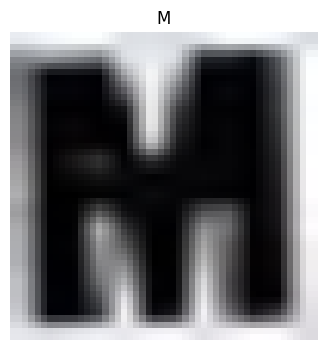

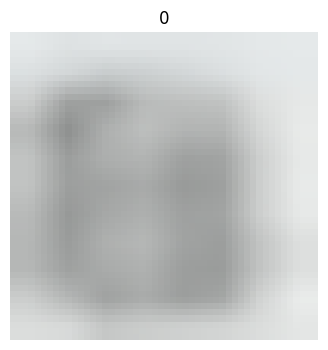

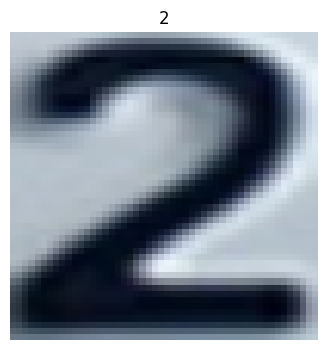

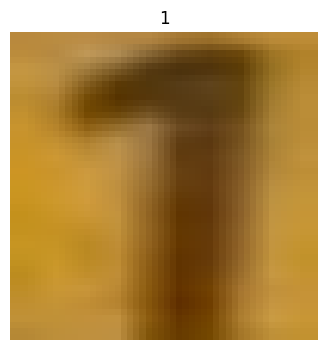

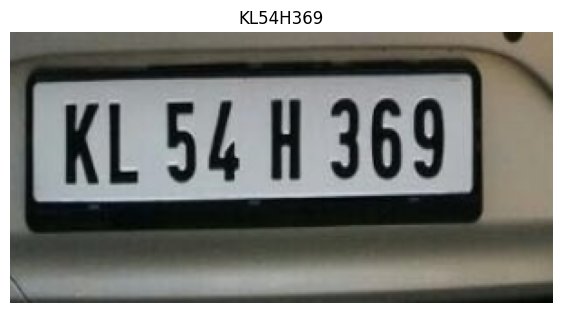

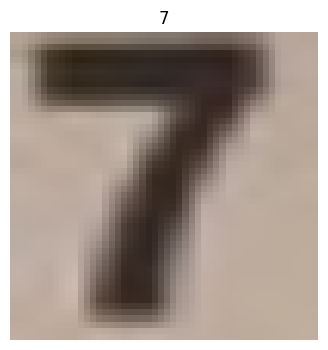

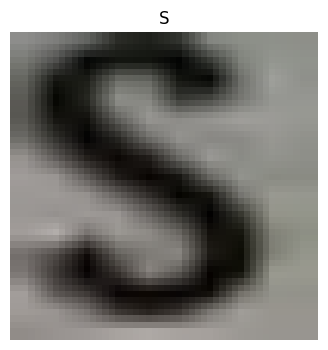

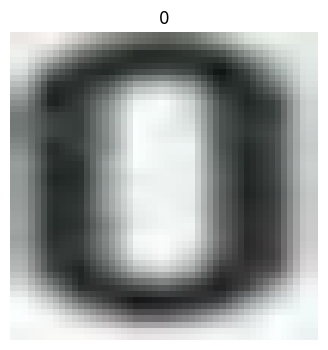

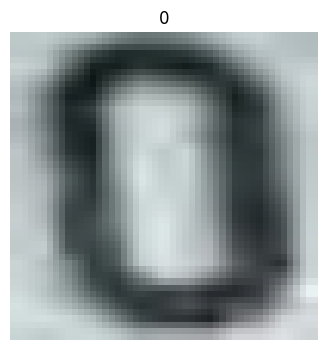

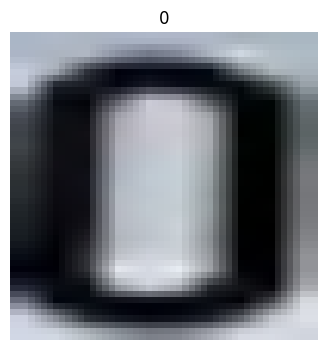

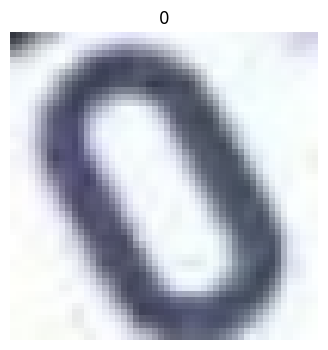

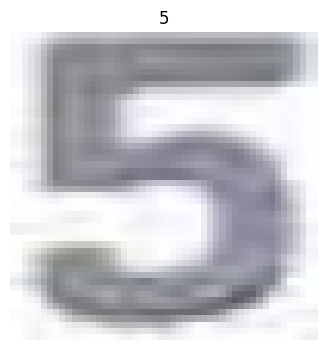

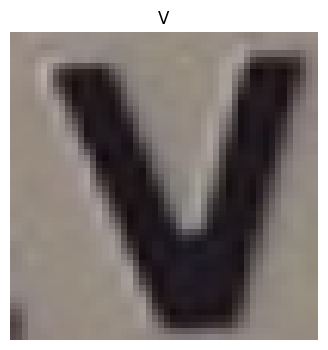

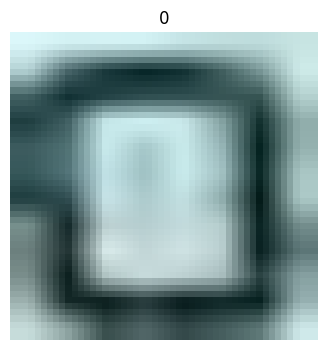

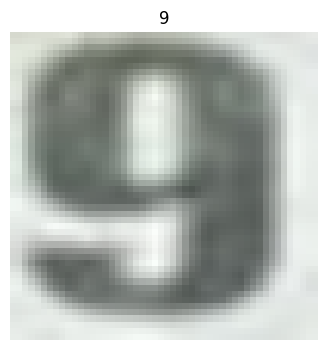

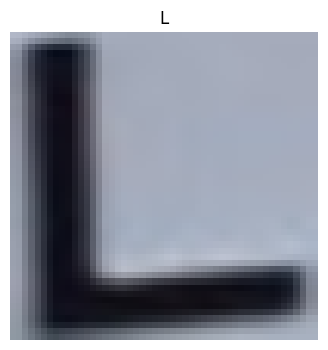

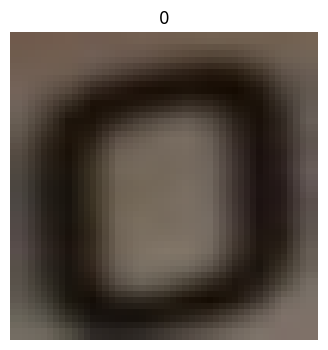

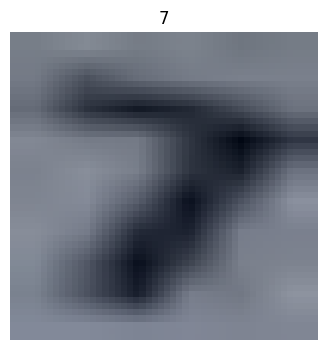

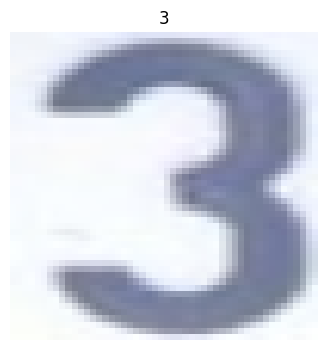

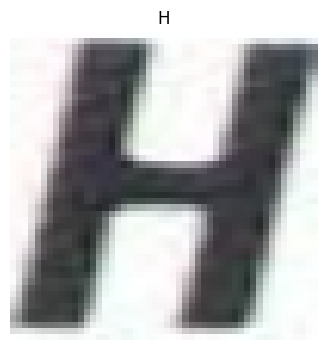

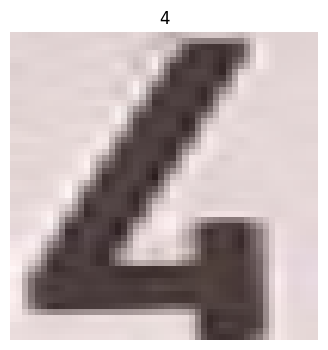

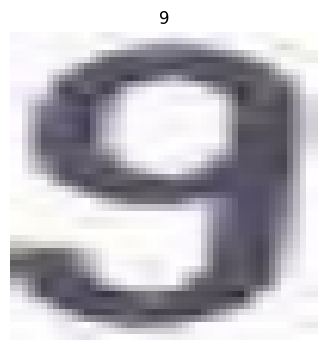

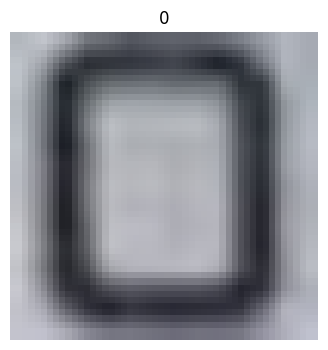

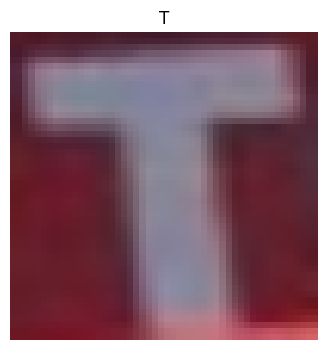

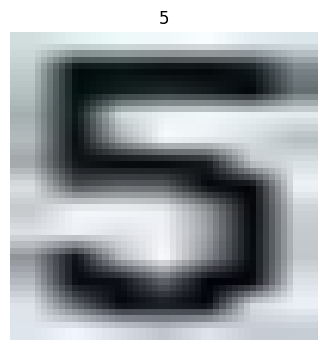

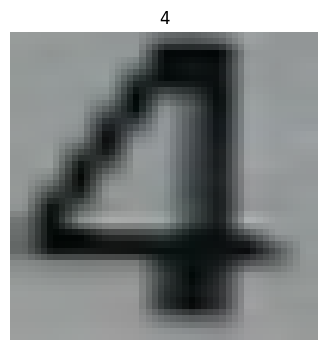

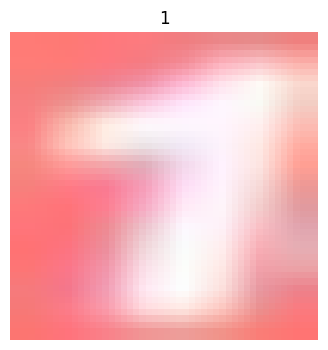

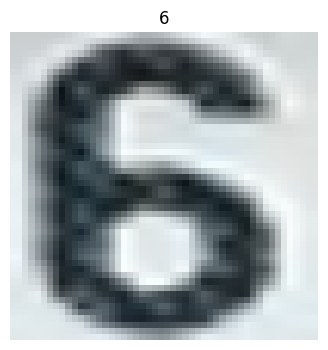

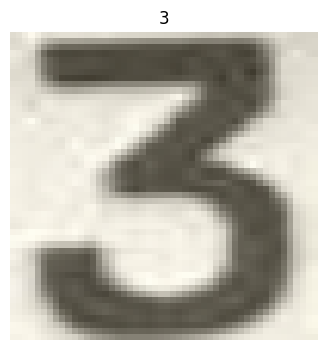

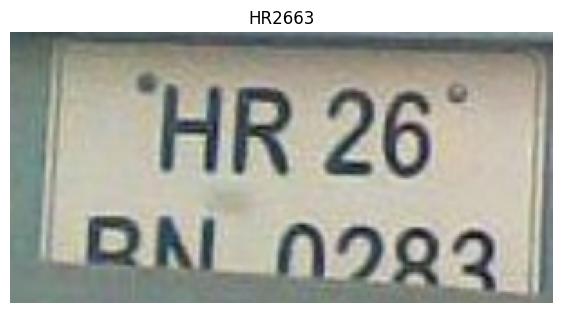

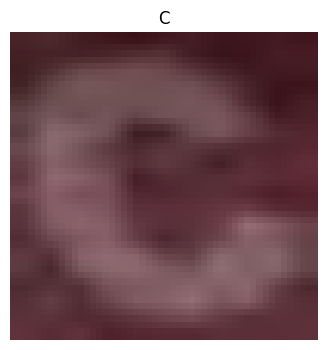

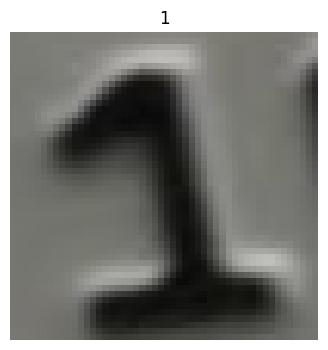

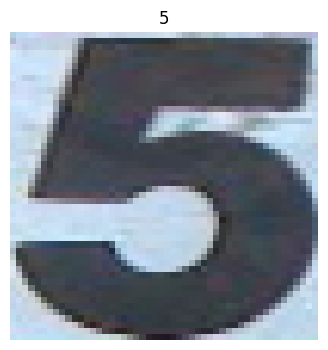

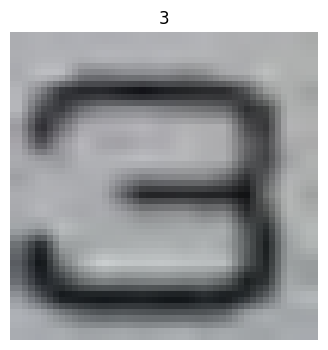

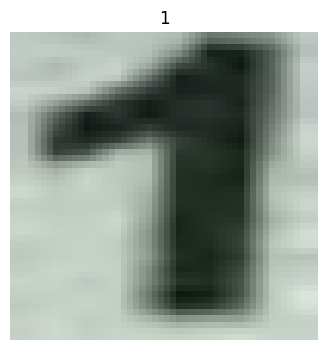

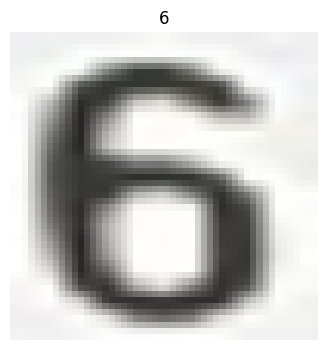

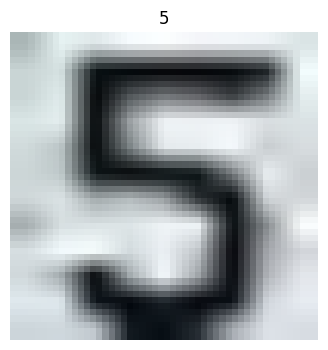

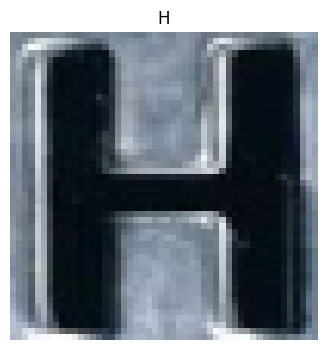

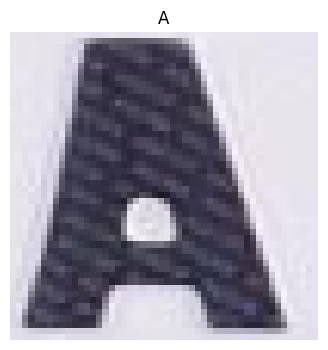

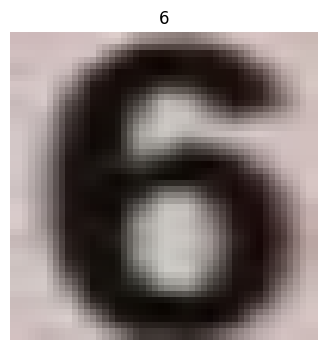

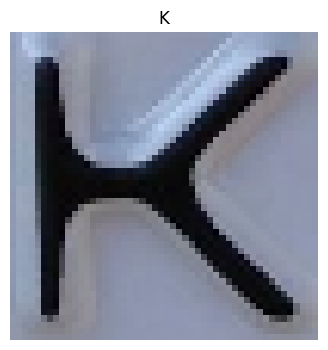

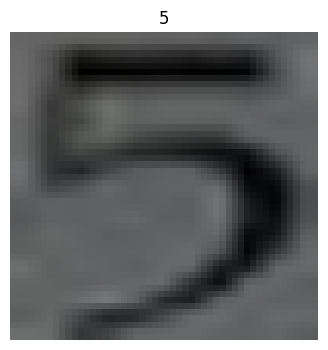

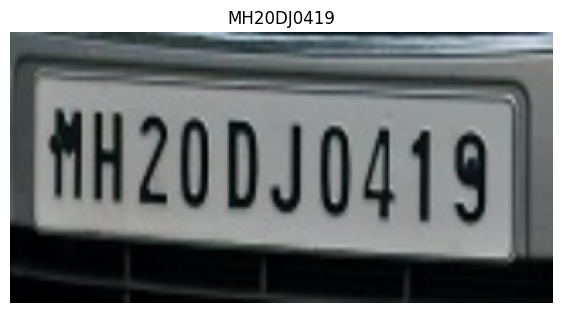

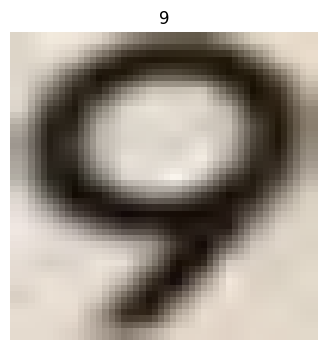

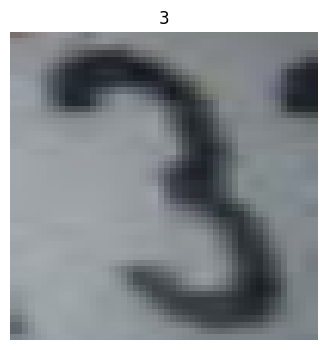

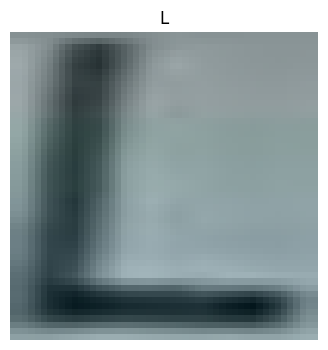

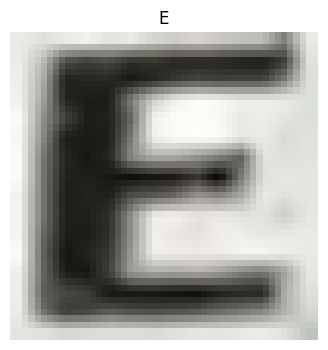

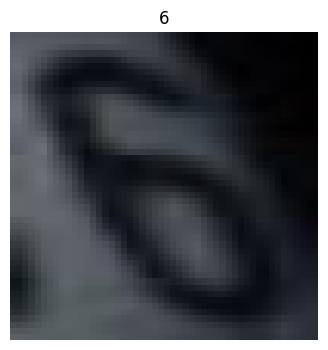

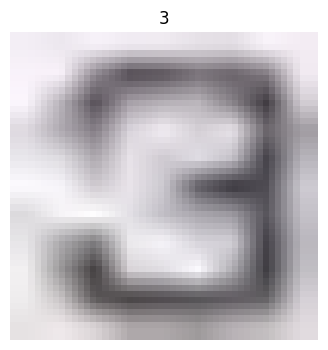

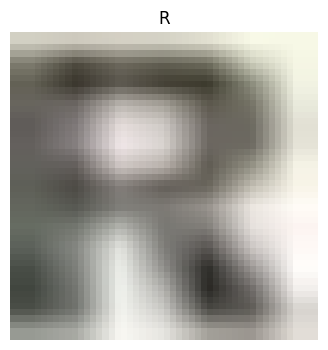

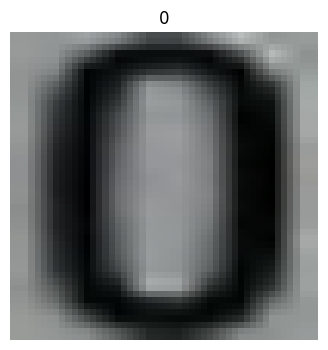

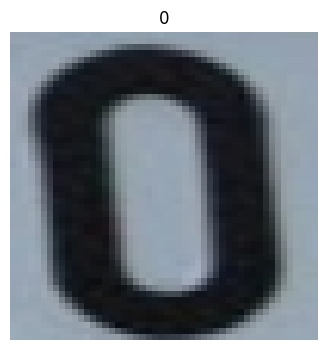

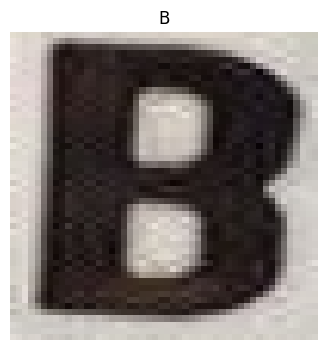

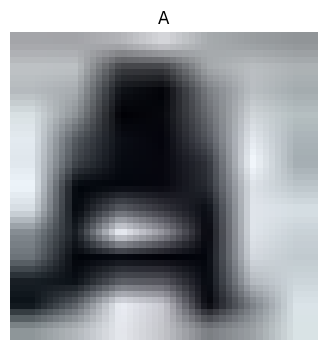

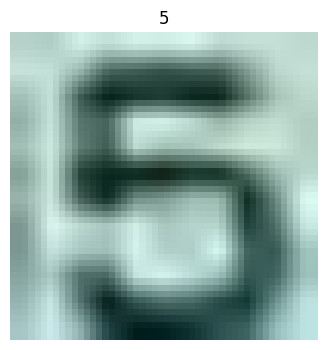

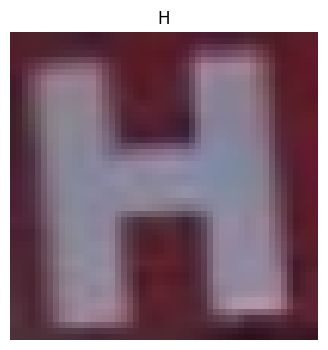

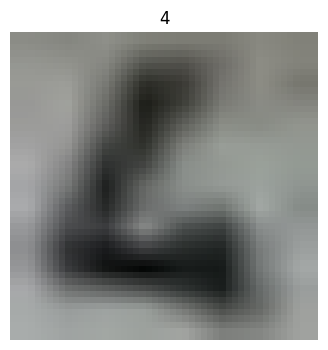

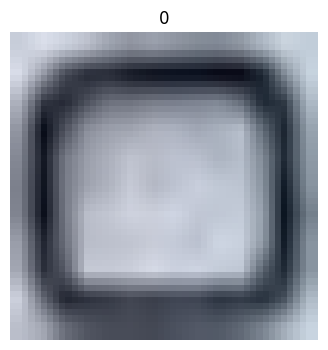

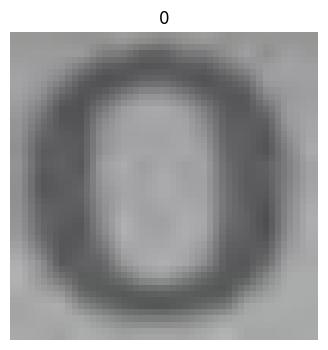

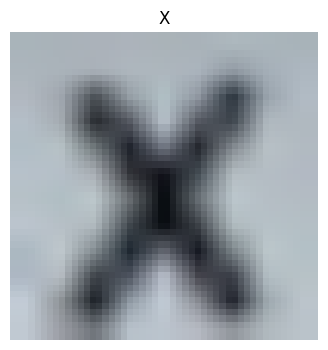

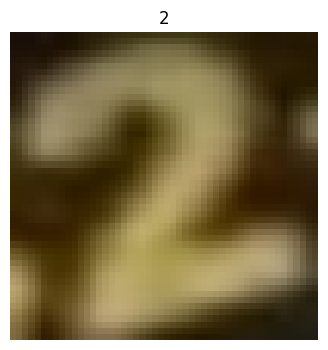

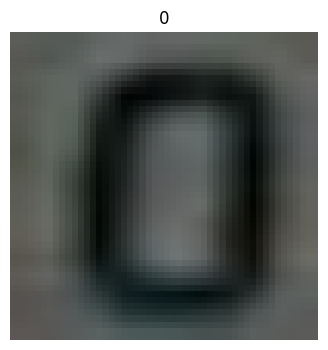

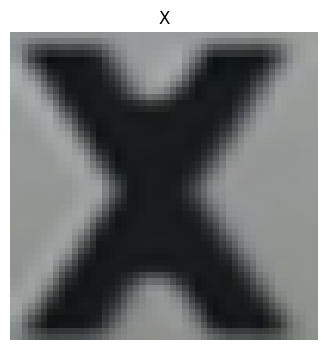

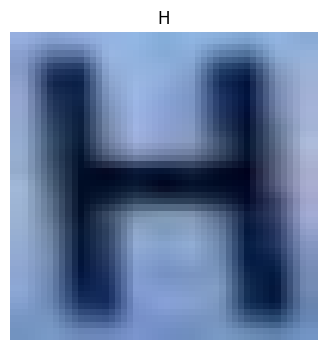

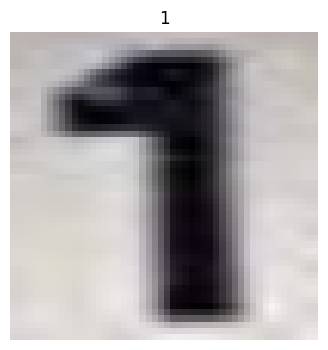

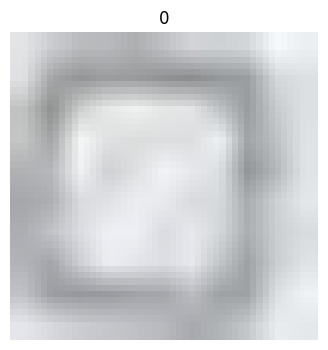

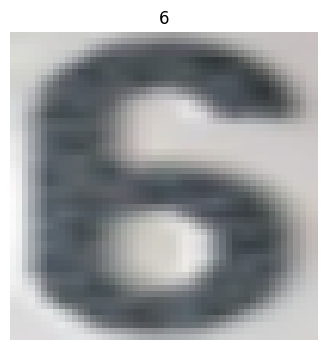

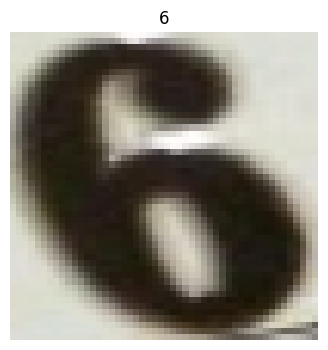

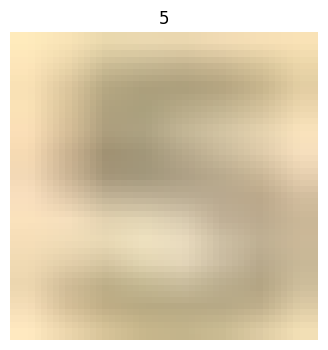

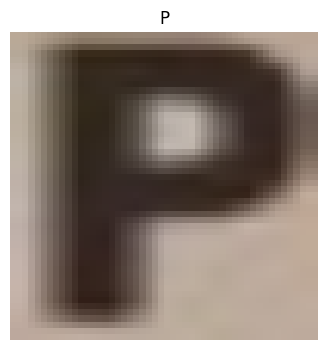

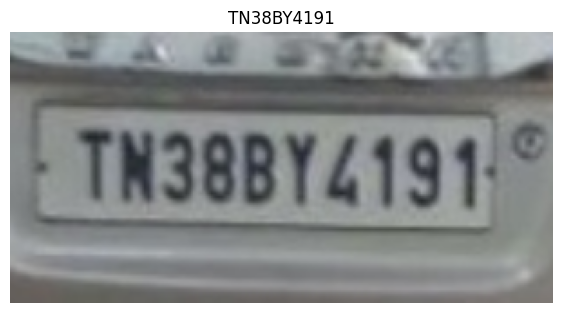

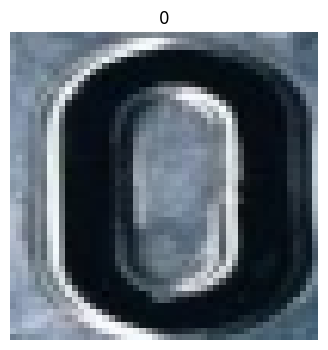

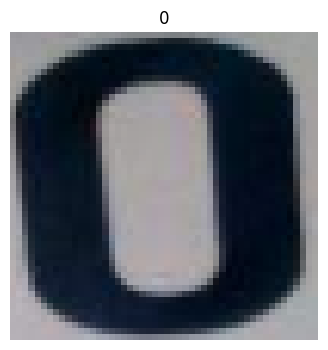

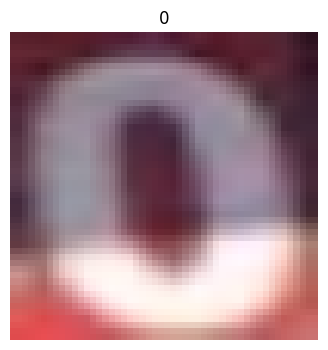

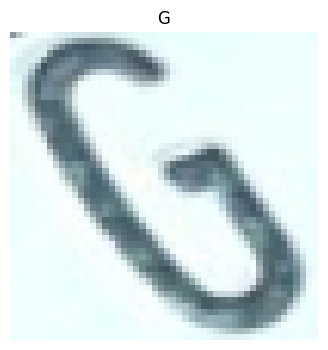

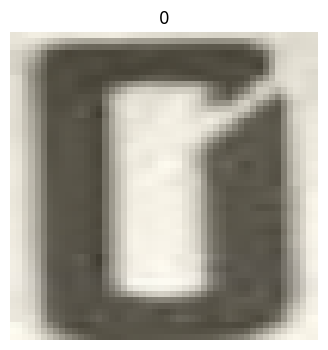

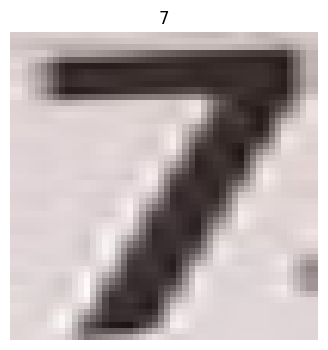

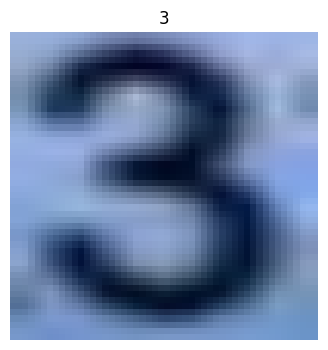

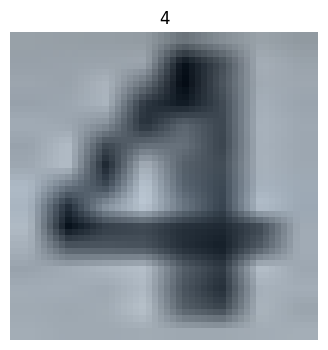

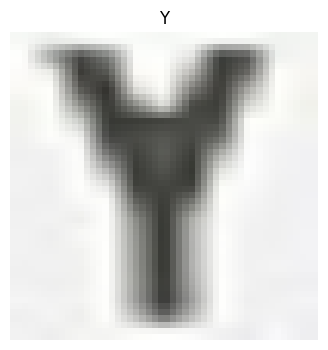

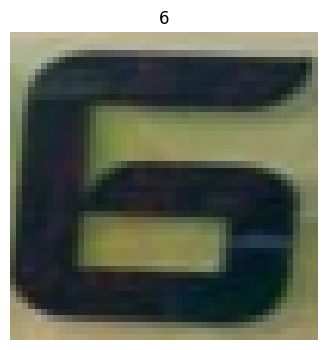

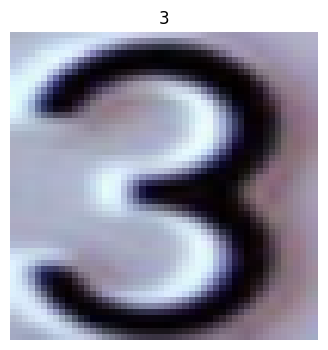

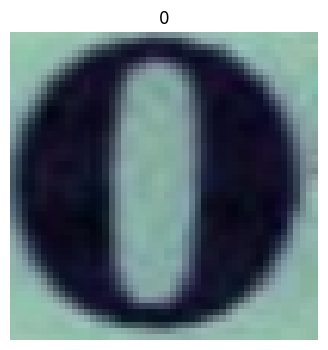

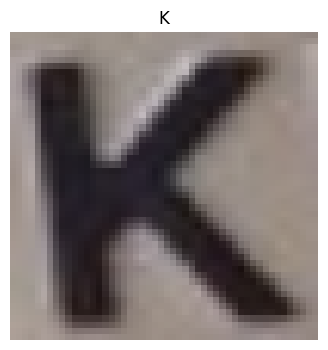

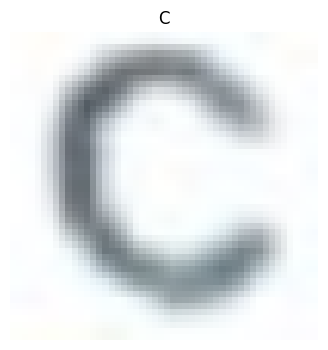

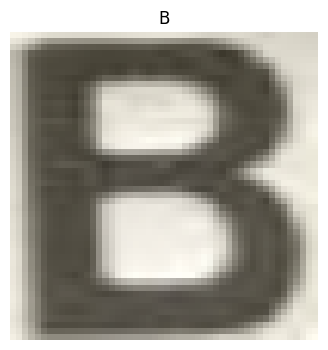

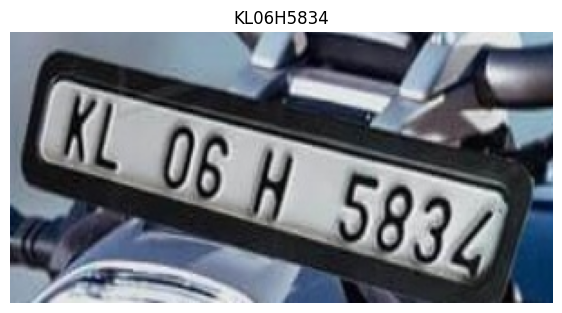

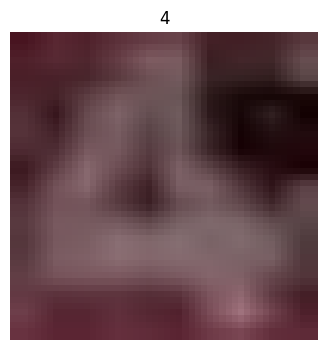

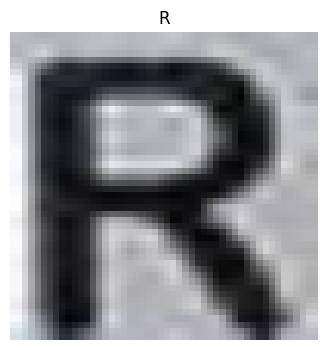

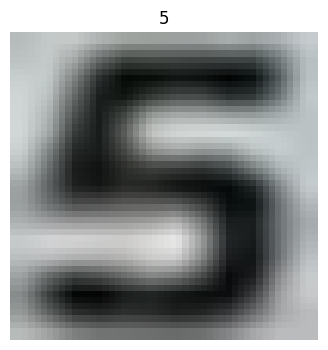

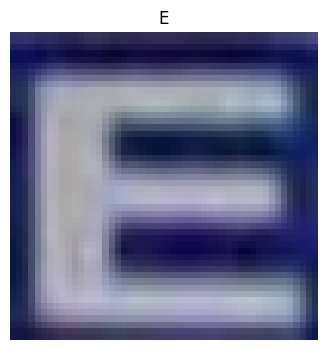

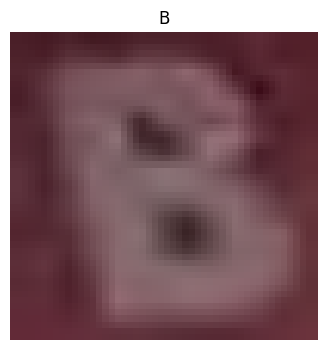

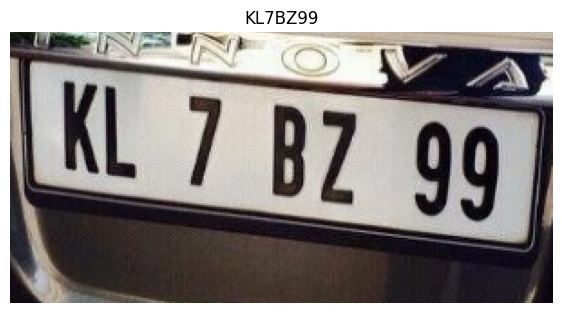

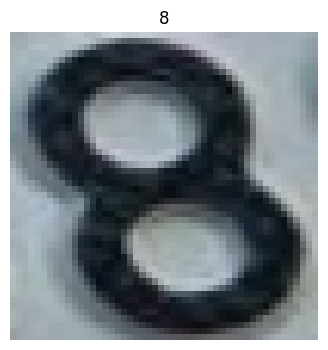

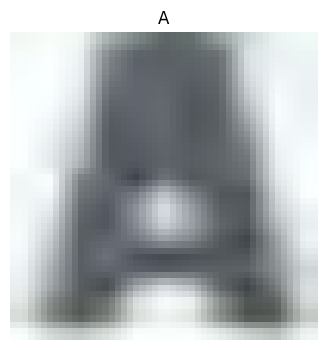

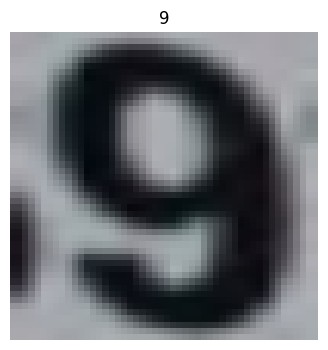

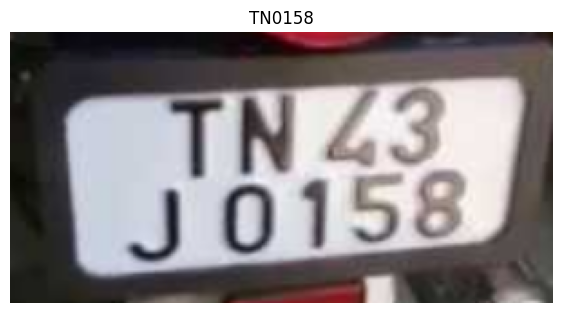

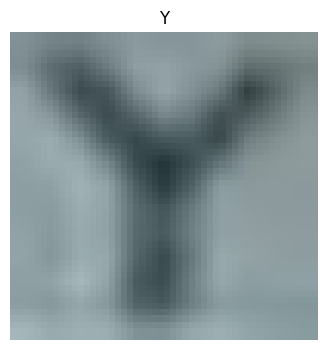

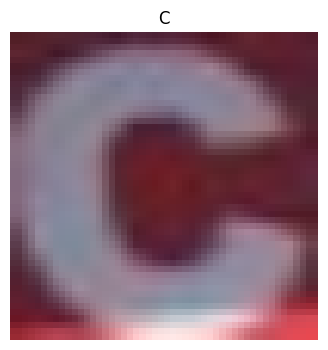

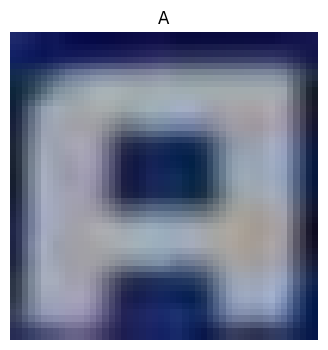

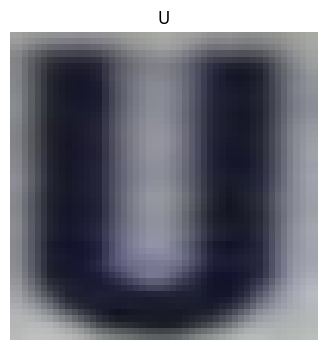

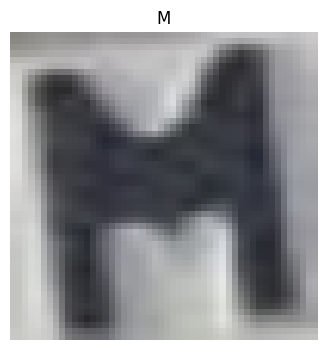

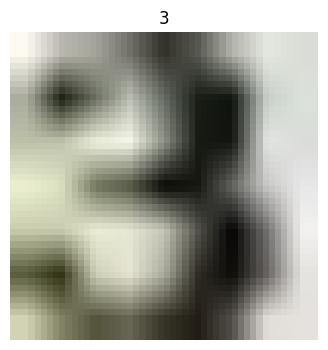

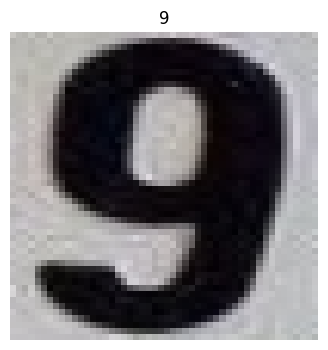

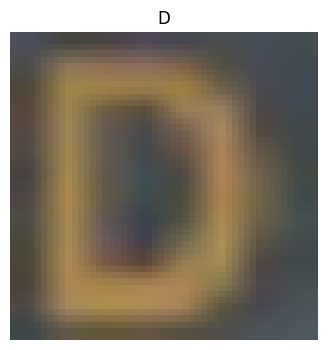

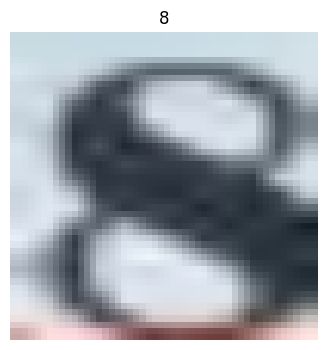

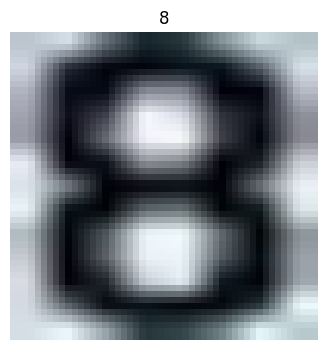

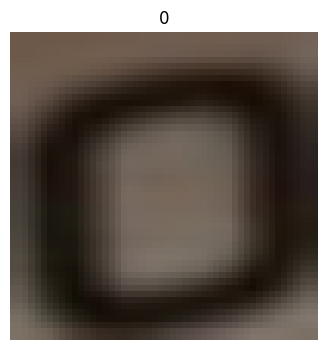

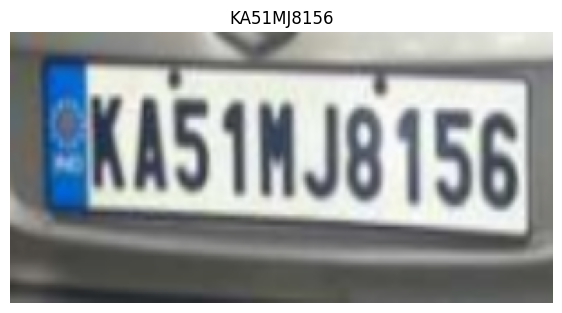

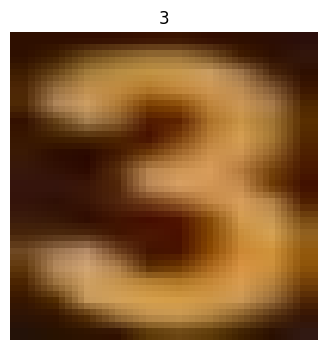

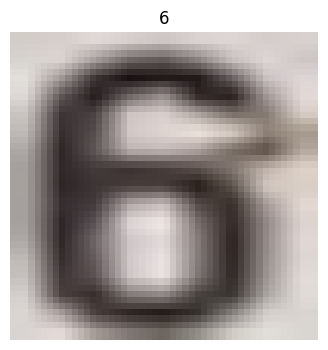

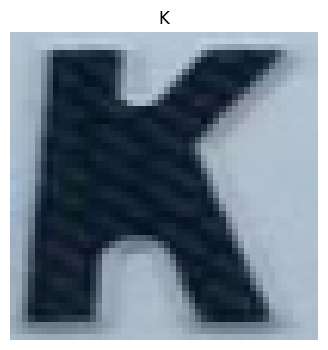

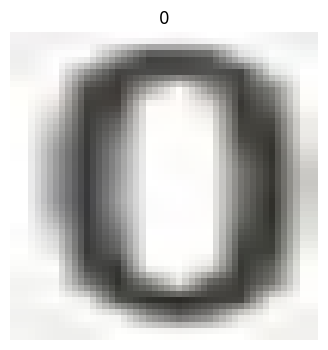

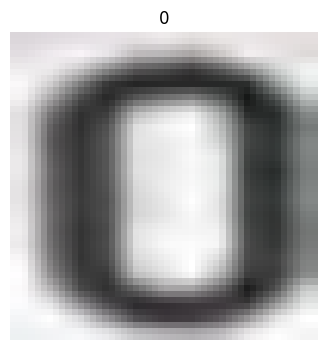

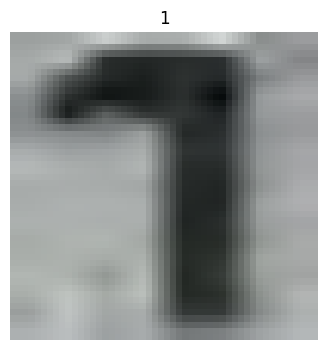

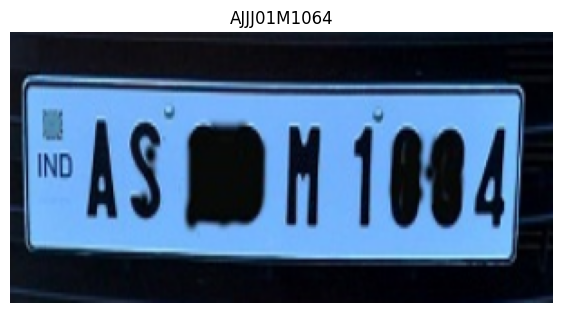

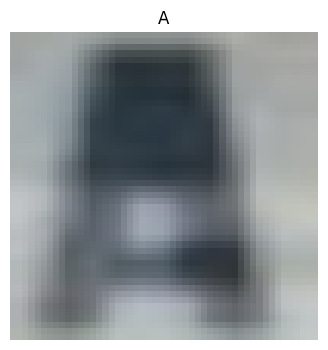

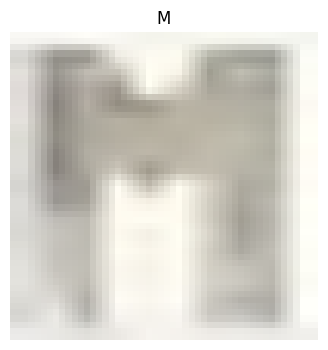

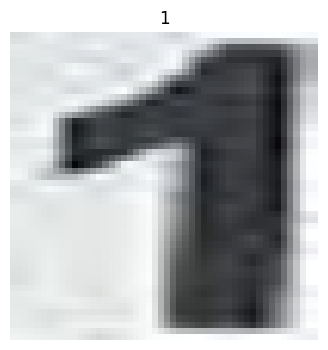

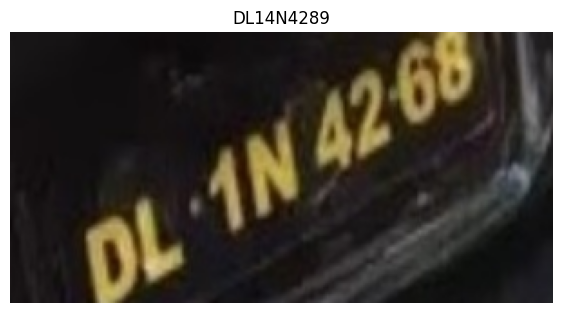

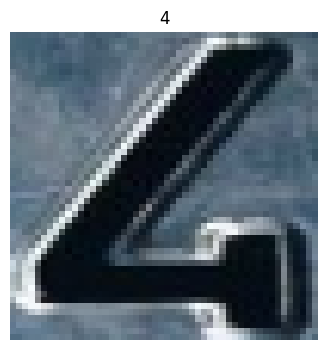

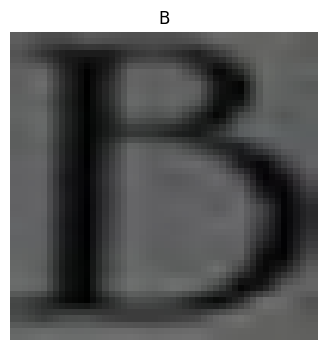

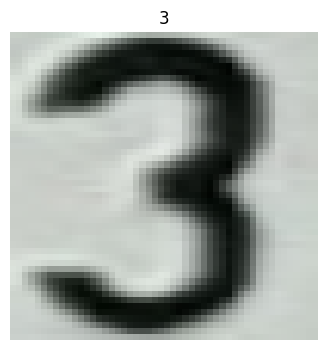

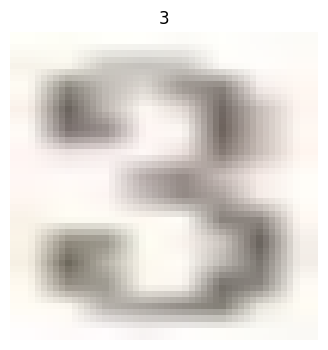

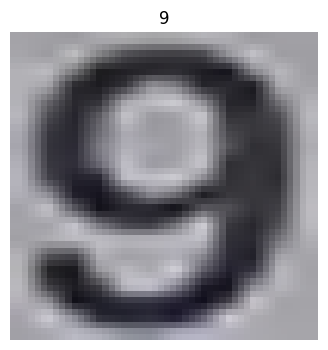

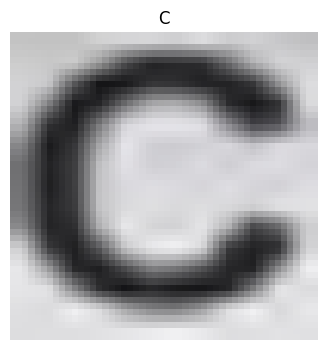

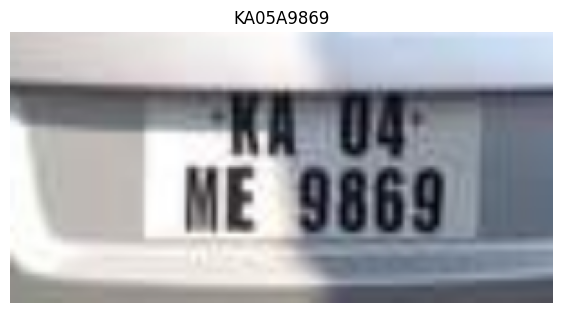

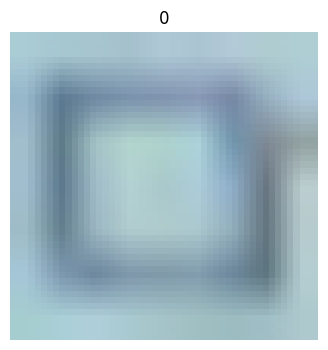

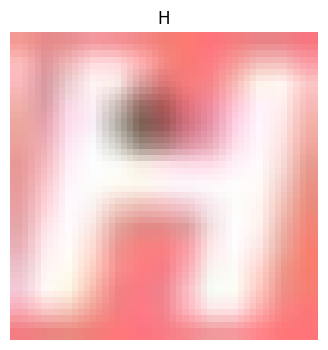

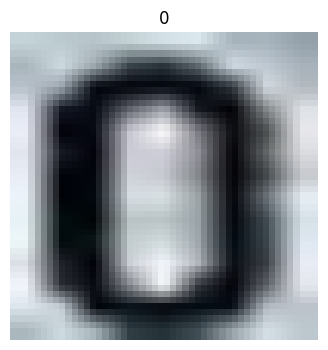

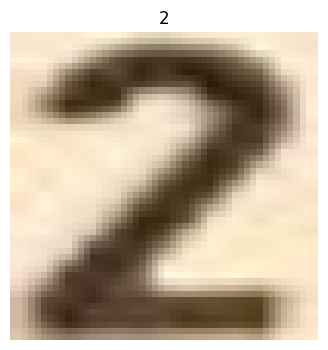

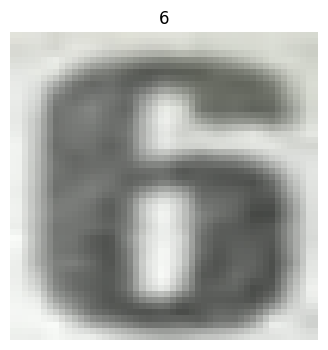

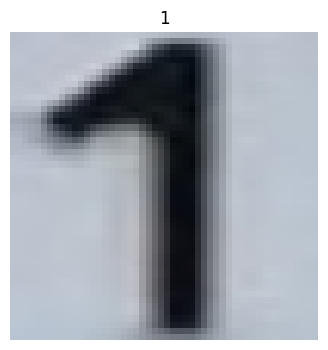

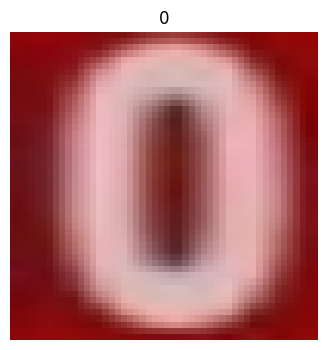

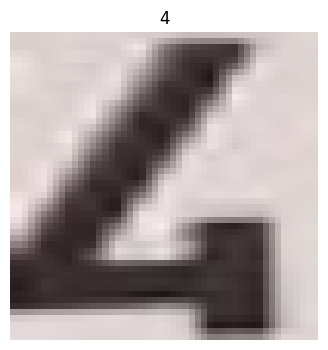

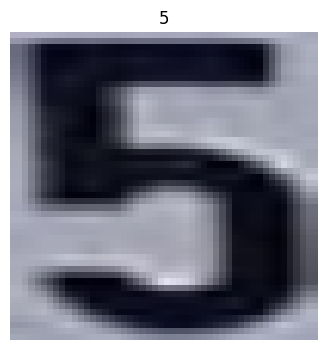

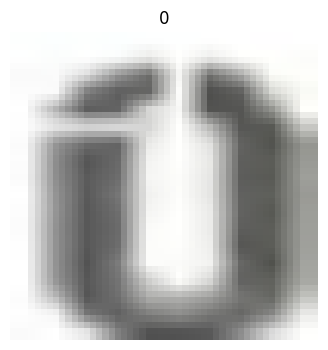

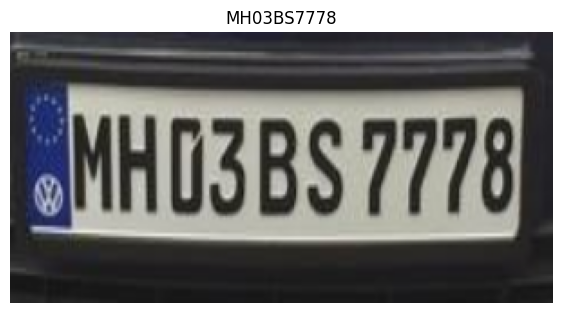

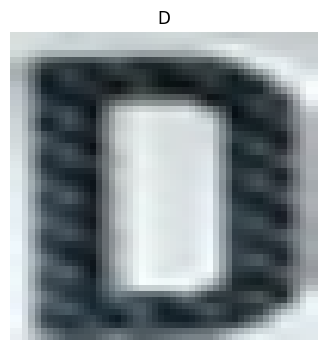

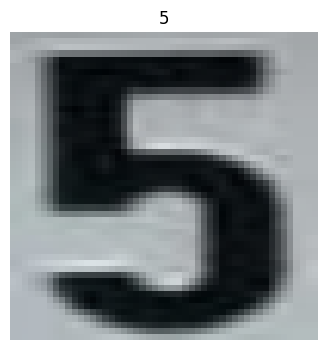

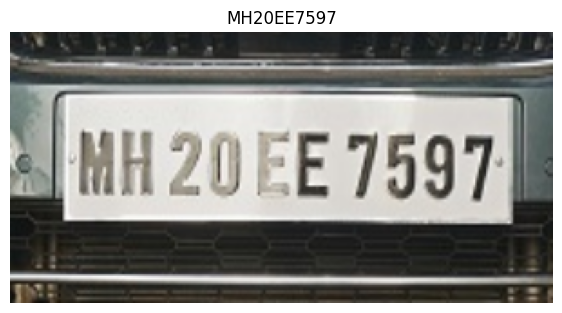

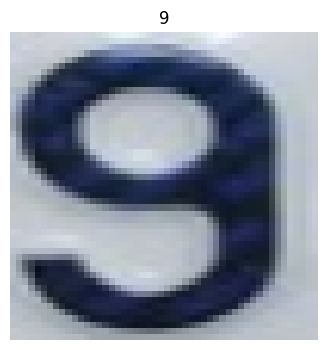

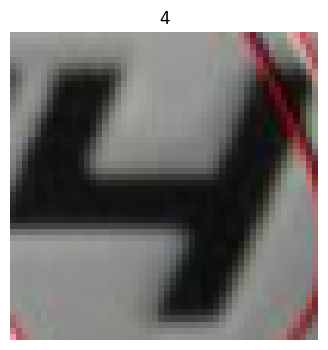

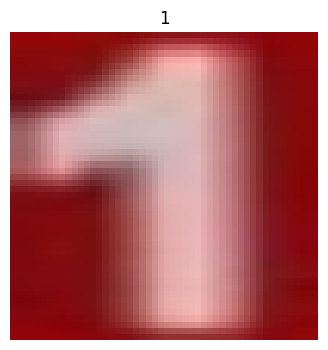

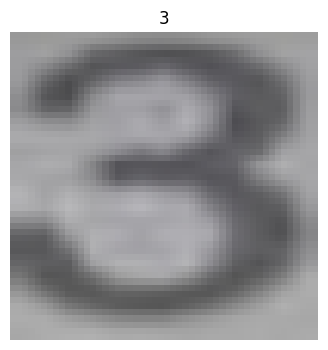

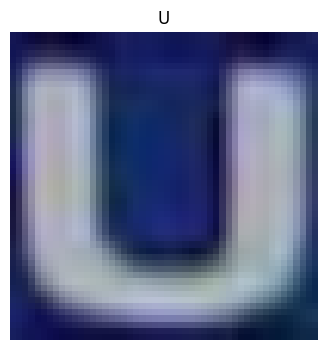

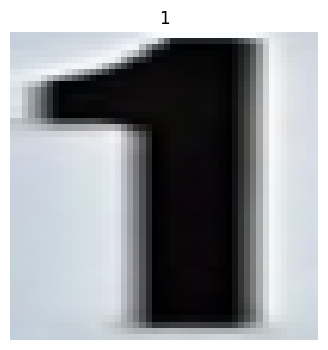

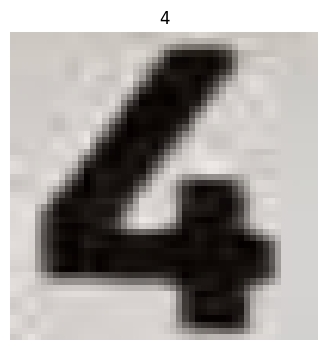

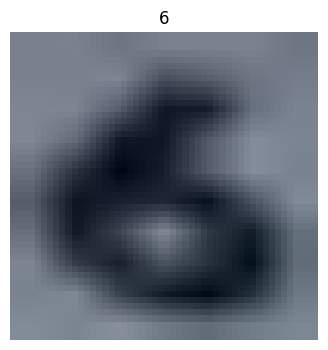

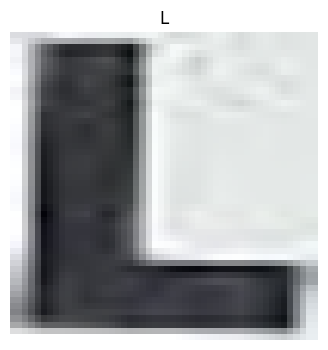

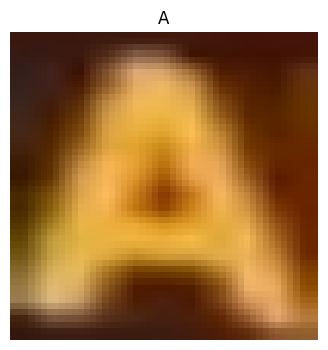

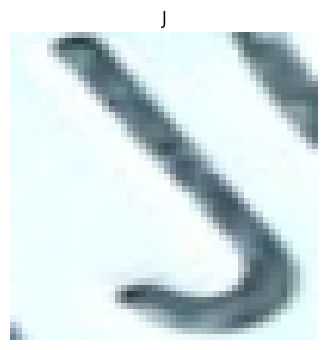

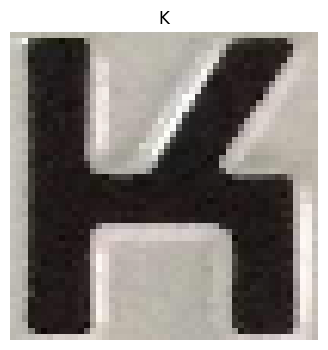

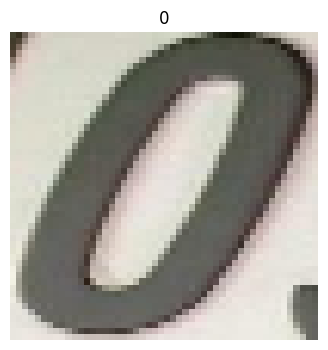

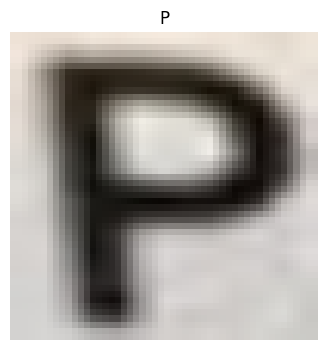

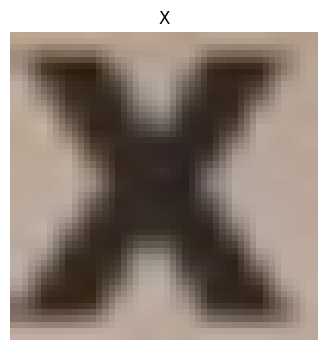

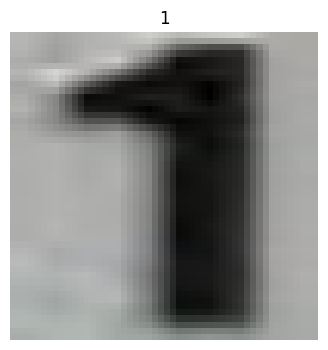

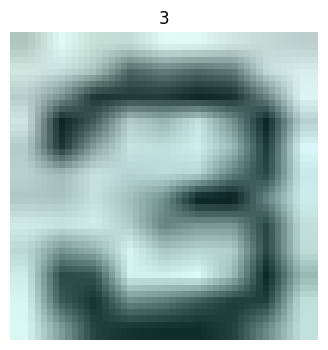

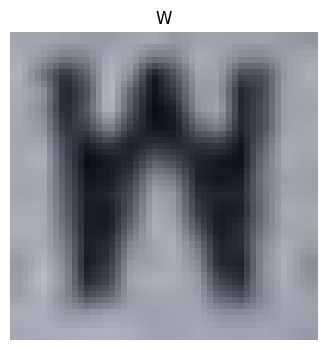

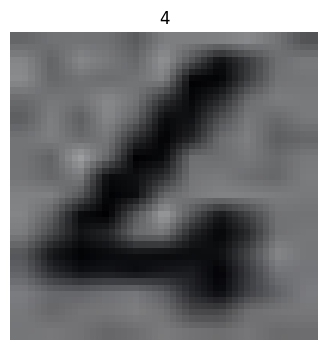

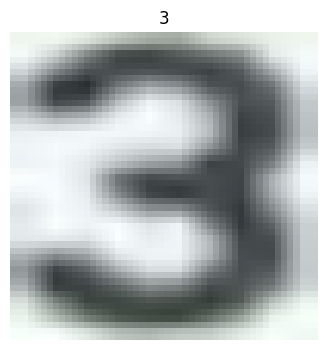

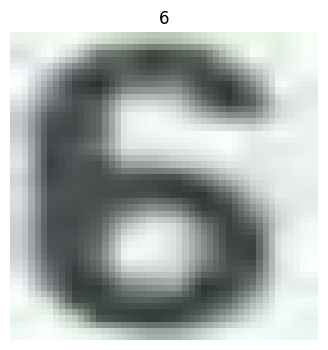

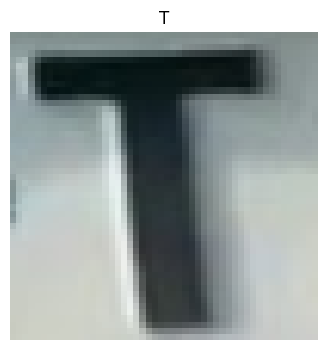

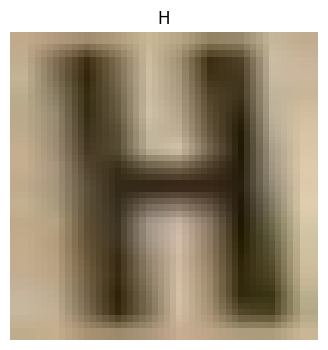

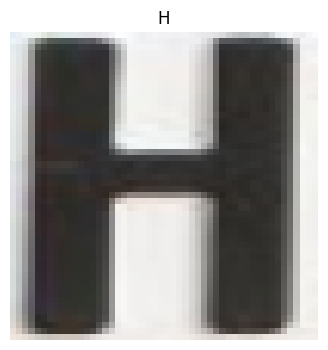

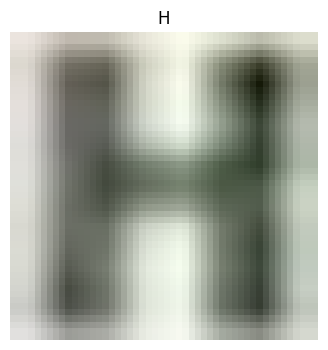

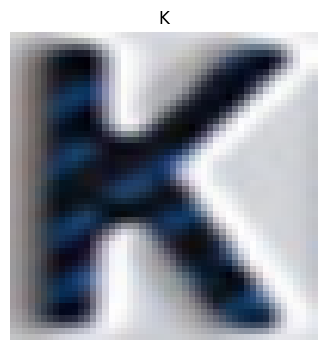

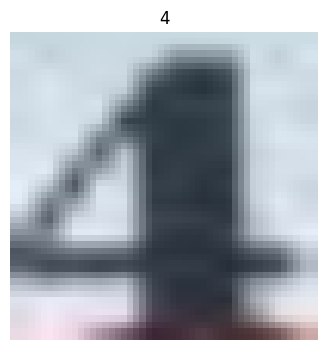

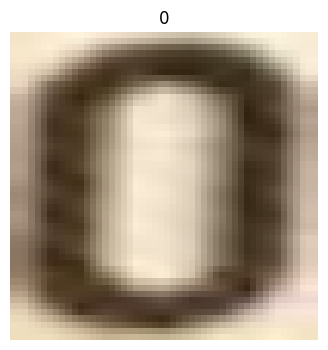

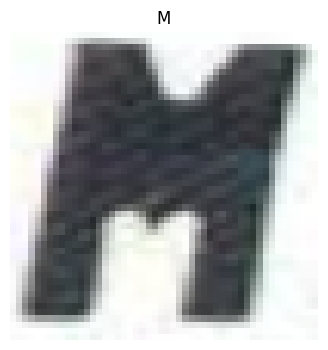

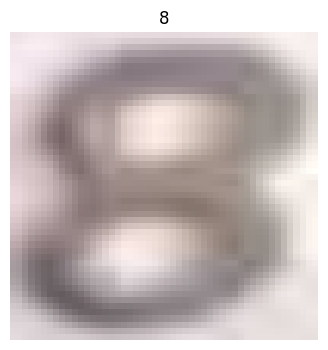

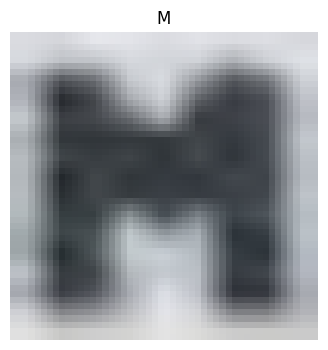

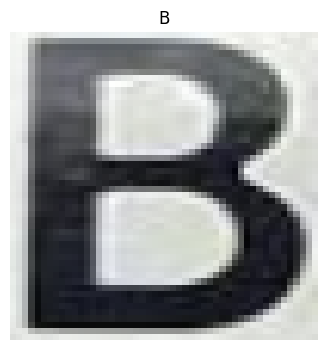

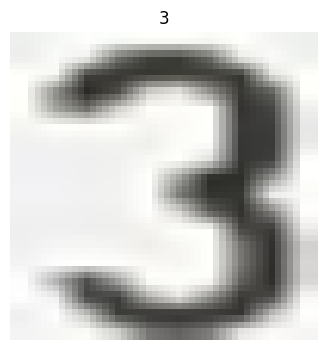

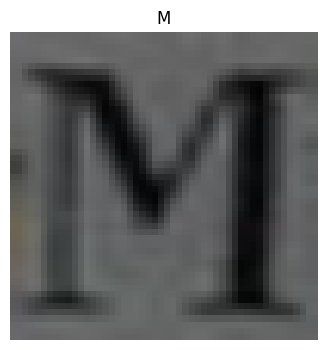

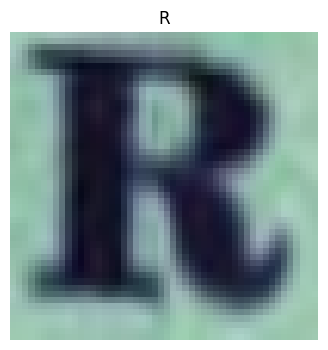

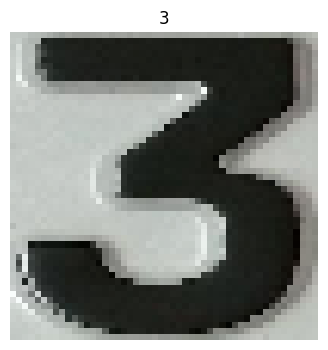

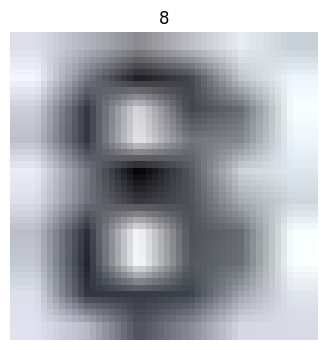

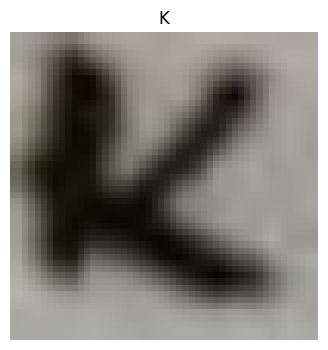

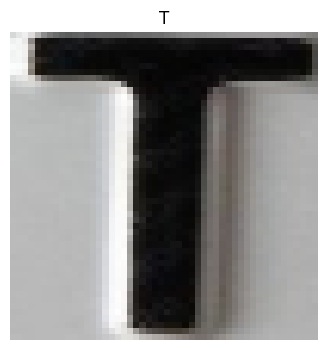

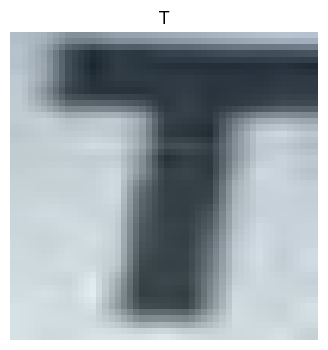

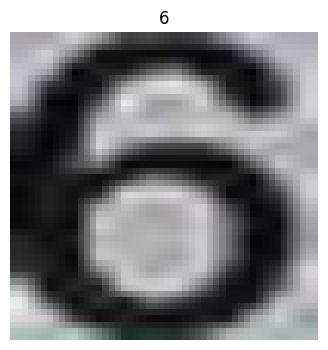

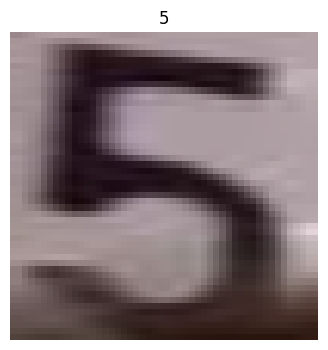

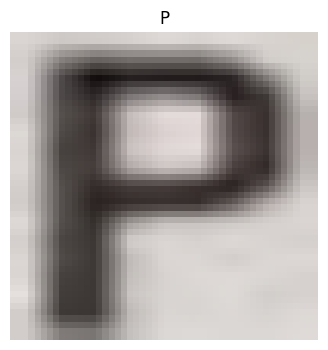

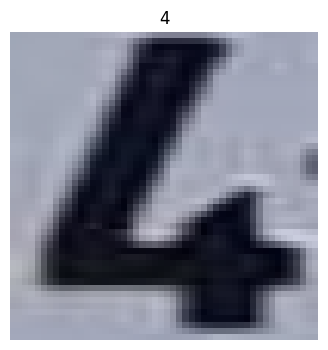

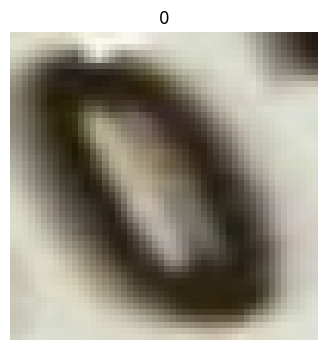

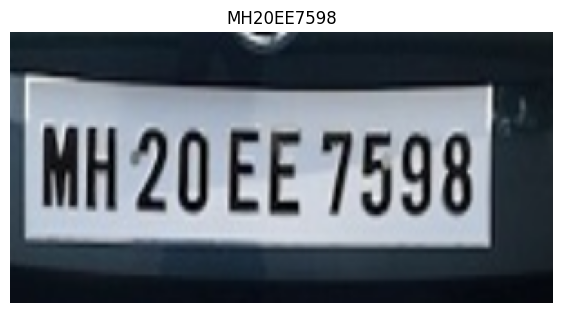

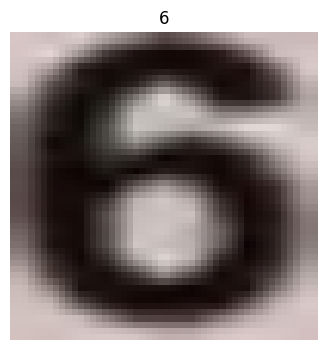

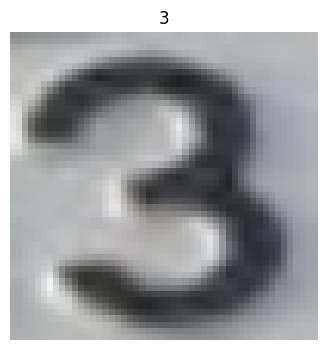

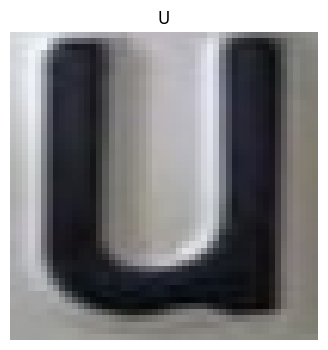

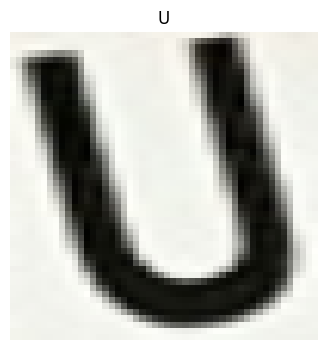

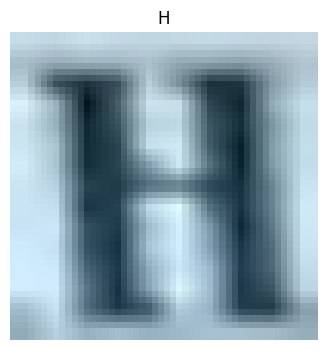

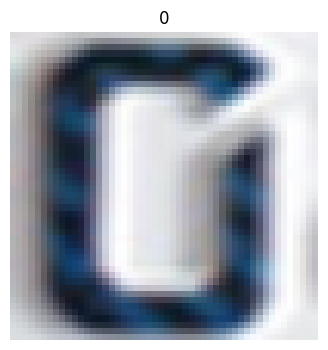

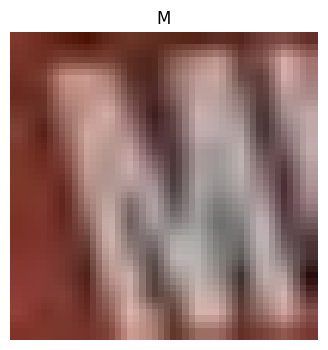

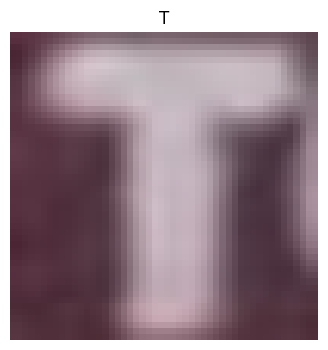

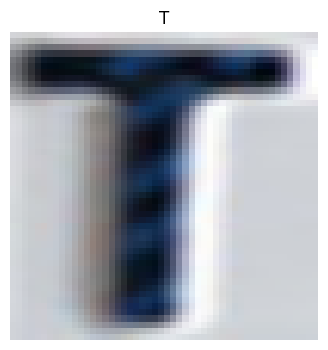

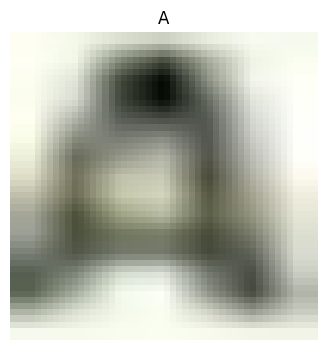

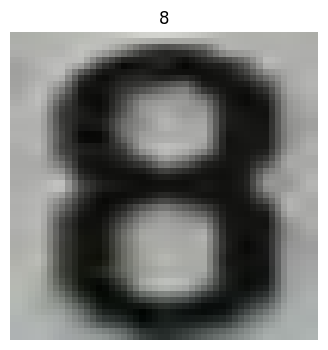

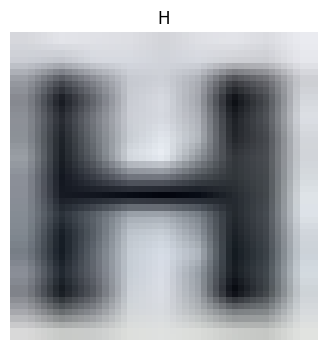

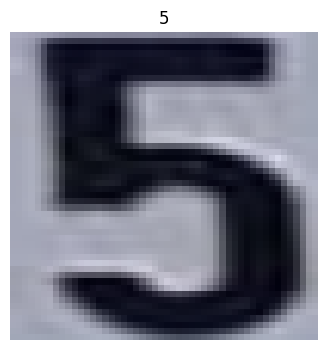

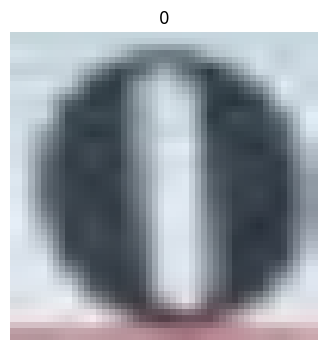

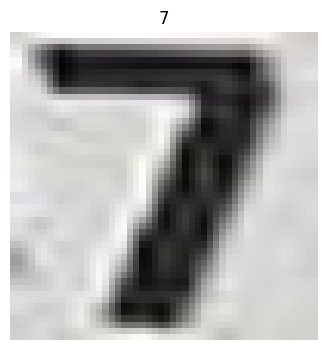

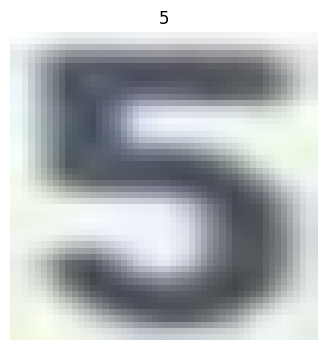

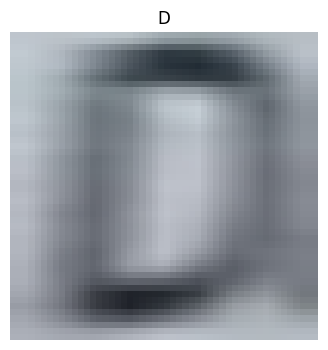

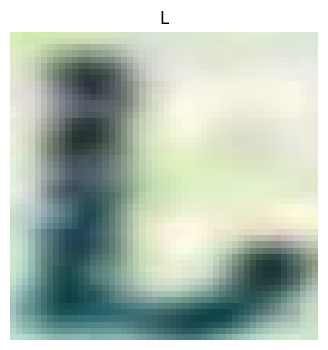

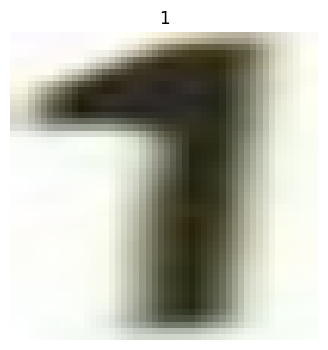

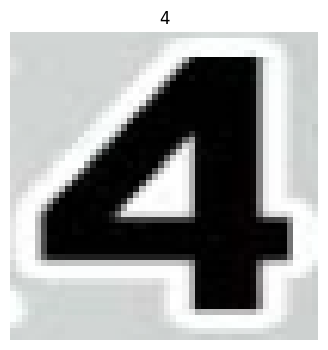

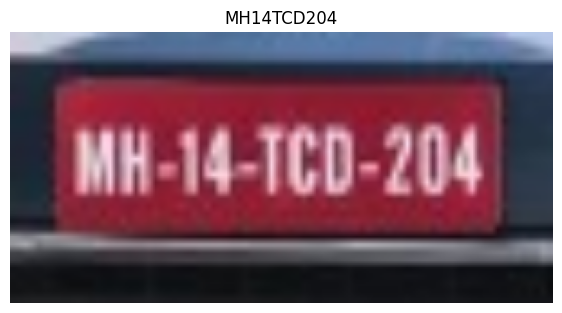

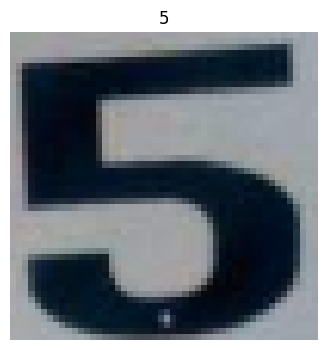

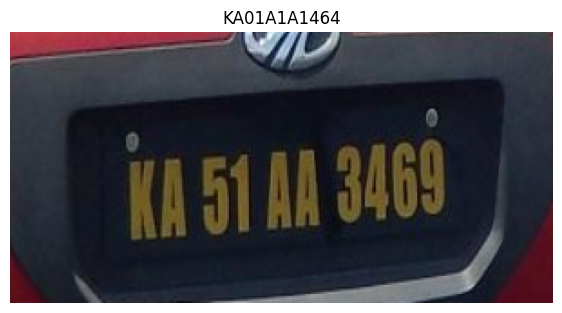

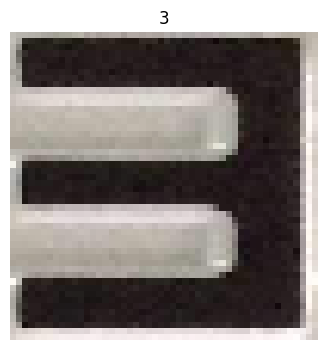

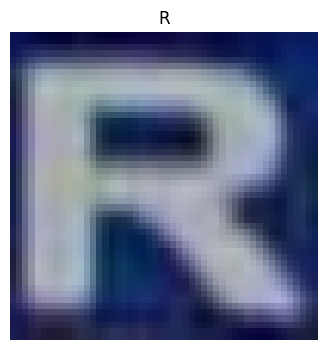

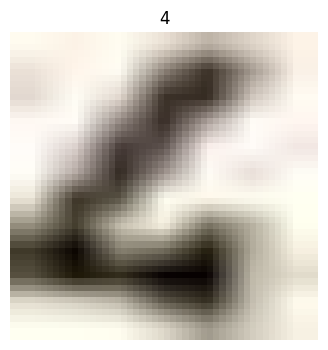

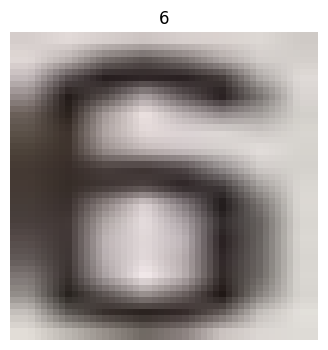

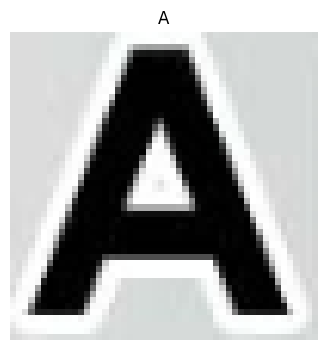

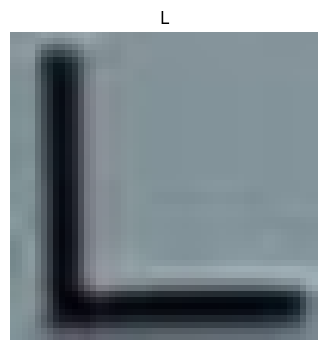

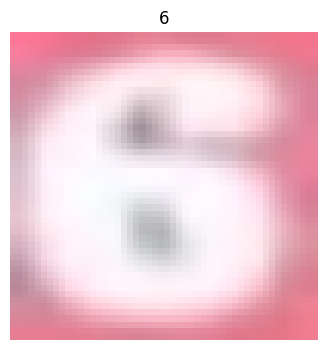

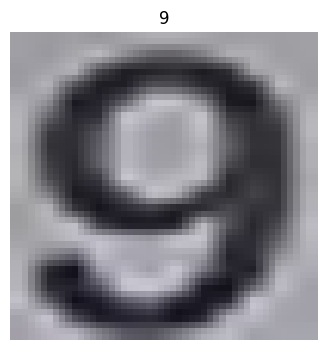

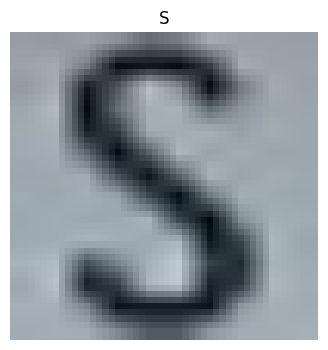

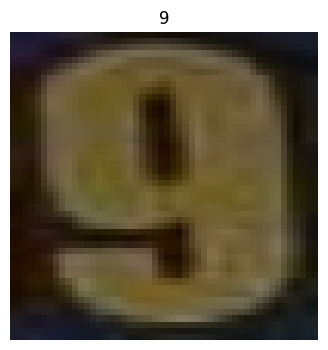

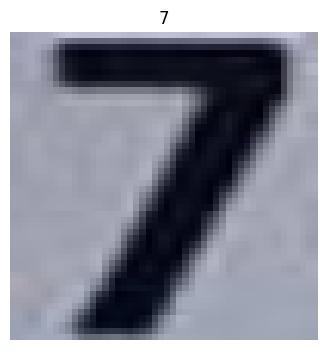

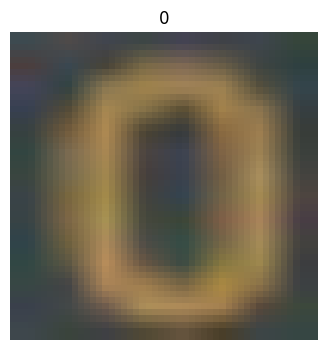

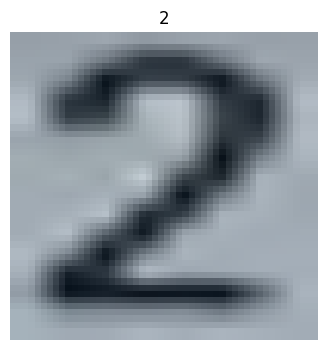

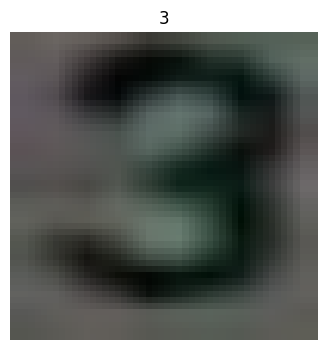

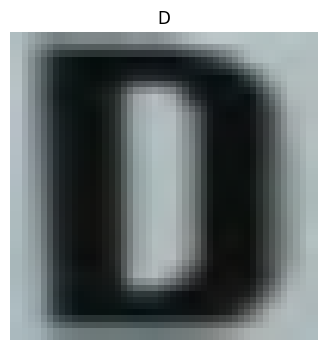

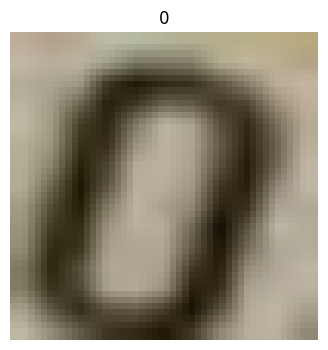

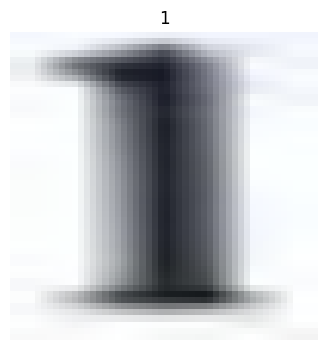

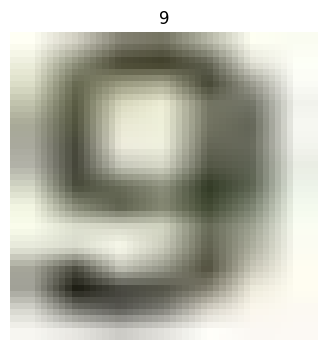

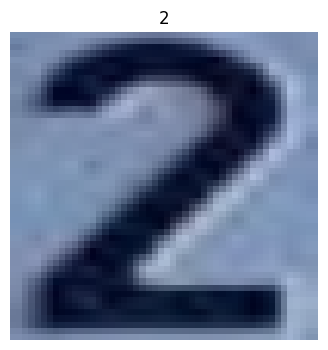

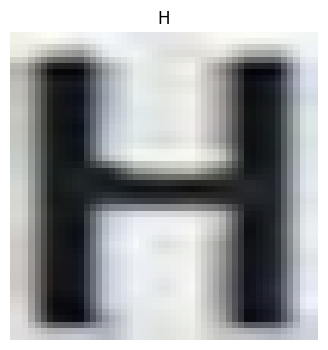

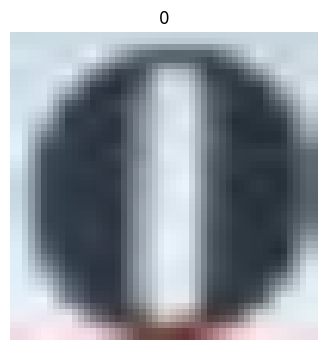

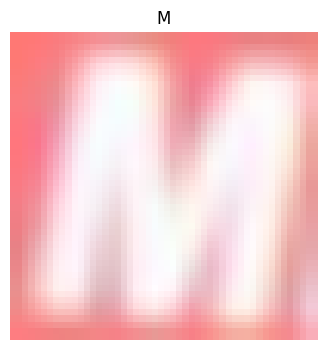

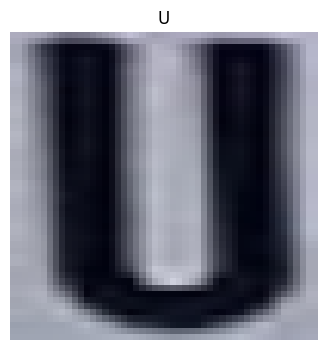

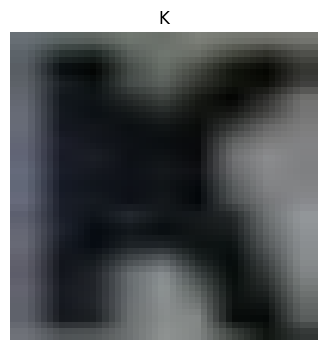

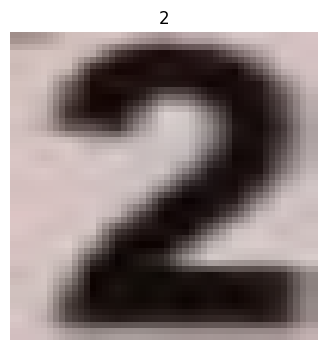

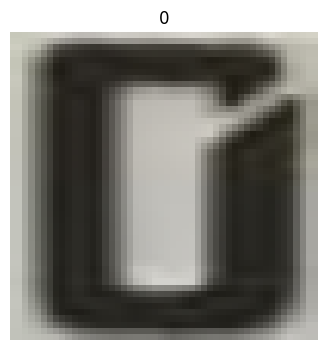

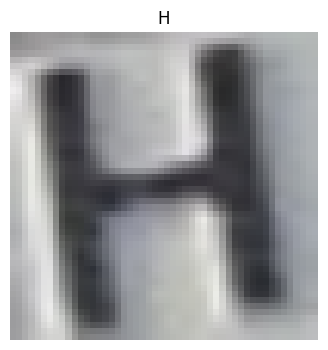

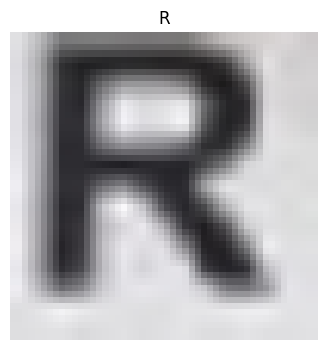

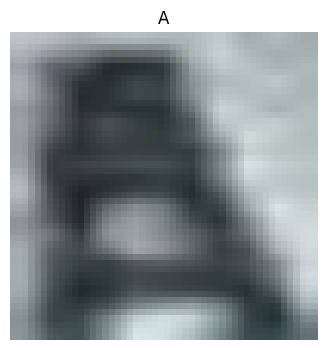

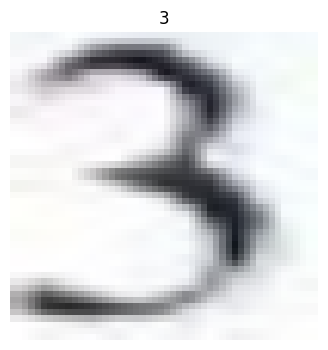

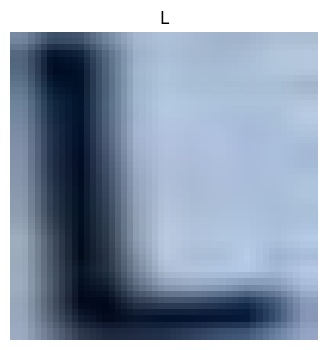

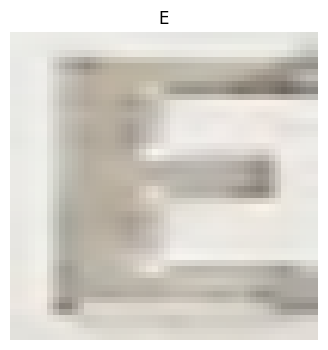

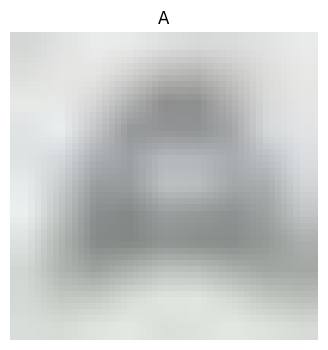

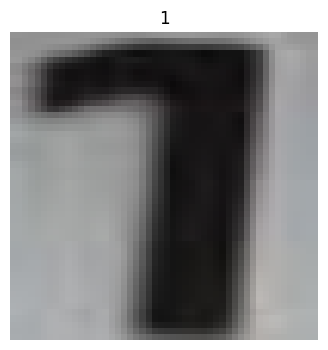

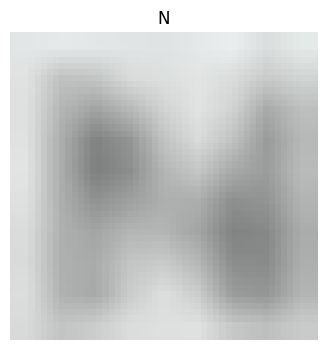

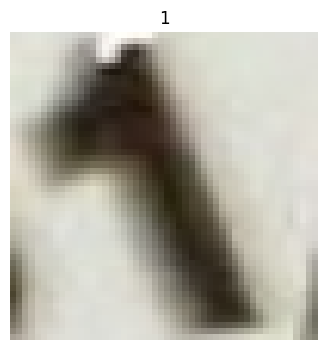

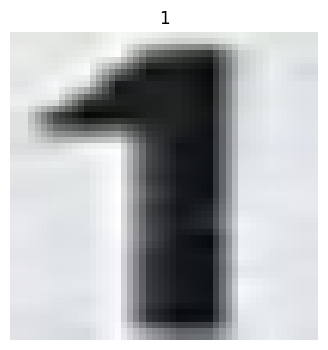

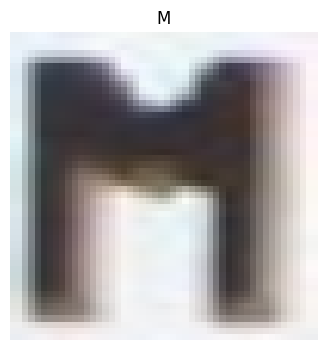

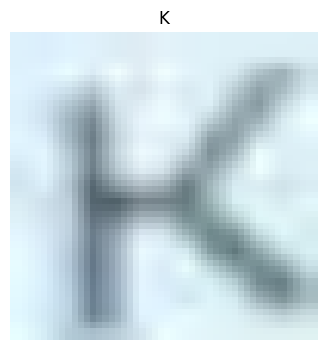

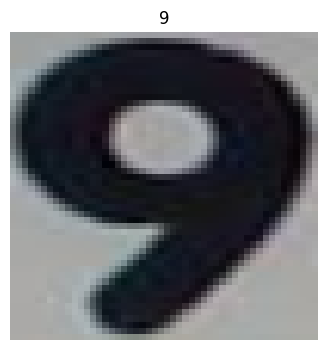

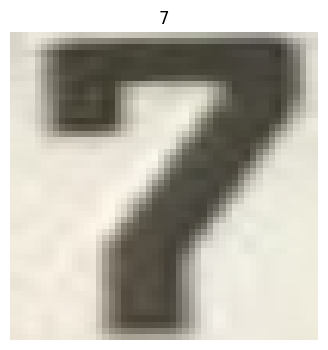

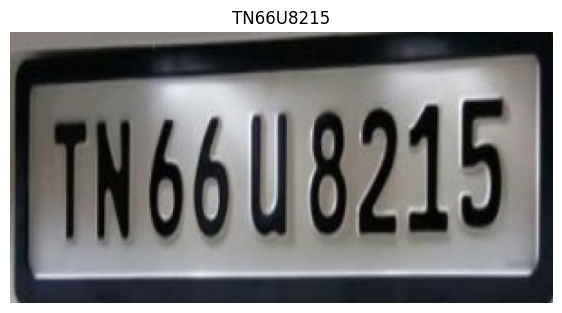

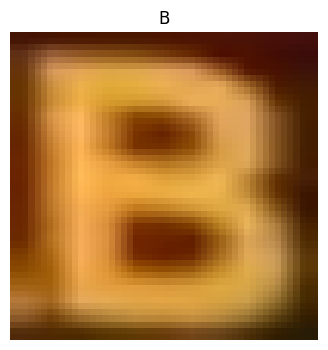

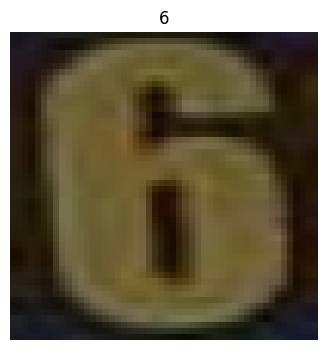

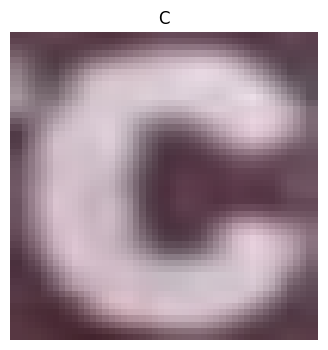

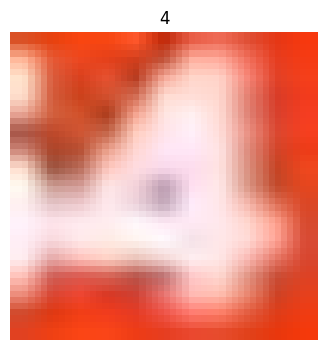

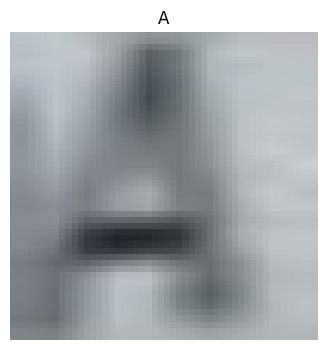

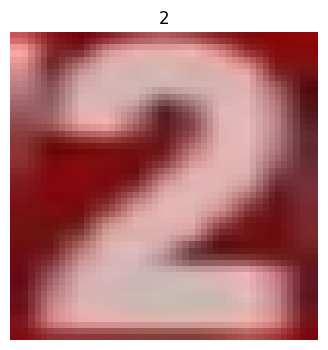

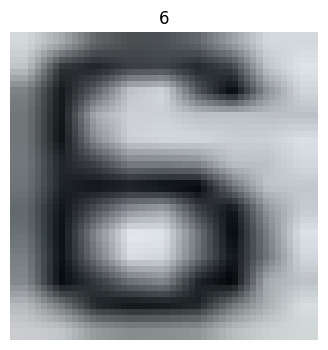

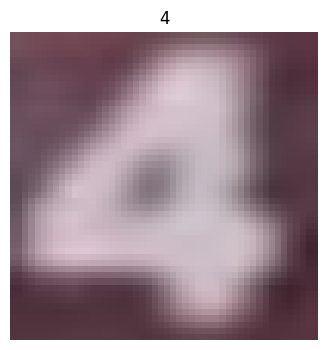

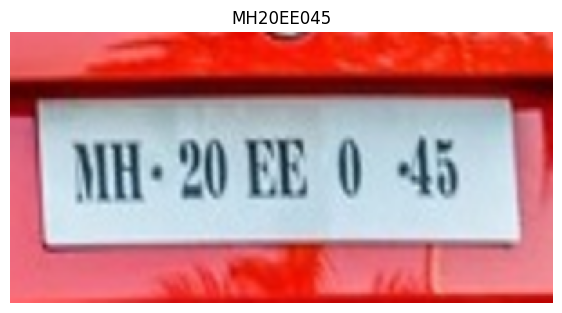

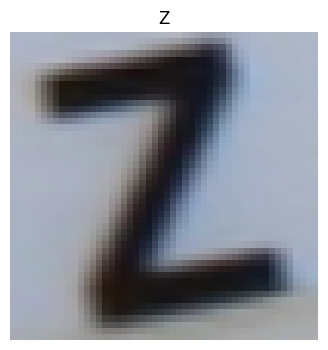

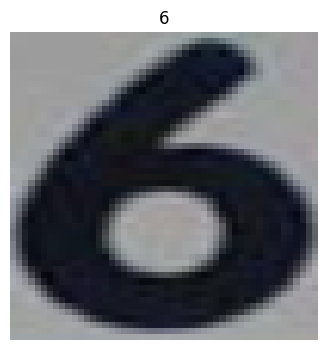

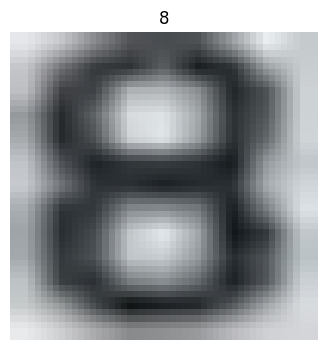

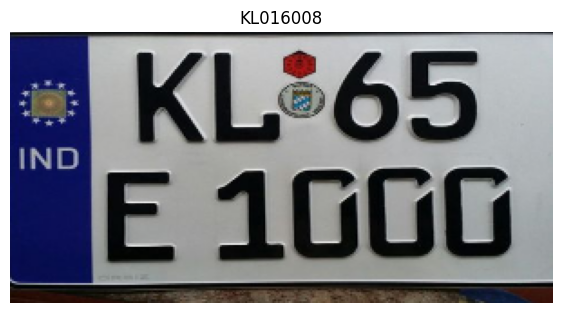

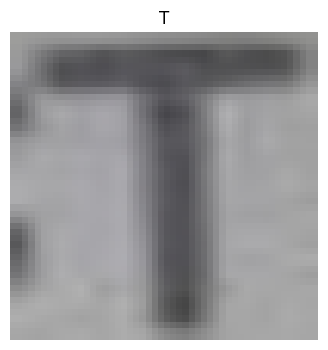

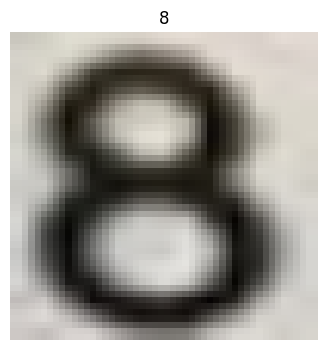

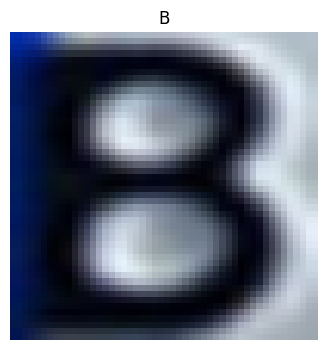

In [ ]:
eval_new_data(
    data_path=os.path.join(DatasetConfig.DATA_ROOT, 'scut_train', '*'),
    num_samples=300
)